<a href="https://colab.research.google.com/github/daechungus/CSM148-Final-Project/blob/main/CS_M148_group_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS M148 Final Project Code

By Nathan Chen, Jessica Yao, Dae Hoon Chung, Angelina Yang, Huy Nguyen

GitHub Repository: https://github.com/daechungus/CSM148-Final-Project/

Note: Our main document code is at the top of this notebook, and all our code for the appendix is at the bottom of this notebook.

# Main Document Code

### Dataset:

This is the Tree Dataset that we chose for our project. It predicts forest cover types which is our target variable from cartographic variables such as elevation features, slopes, horizontal/vertical distance to water sources, hillshades, and distance to fire points.

In [1]:
!pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
covertype = fetch_ucirepo(id=31)

# data (as pandas dataframes)
X = covertype.data.features
y = covertype.data.targets

df_combined = X.copy()
df_combined['Cover_Type'] = y['Cover_Type']

# metadata
print(covertype.metadata)

# variable information
print(covertype.variables)

{'uci_id': 31, 'name': 'Covertype', 'repository_url': 'https://archive.ics.uci.edu/dataset/31/covertype', 'data_url': 'https://archive.ics.uci.edu/static/public/31/data.csv', 'abstract': 'Classification of pixels into 7 forest cover types based on attributes such as elevation, aspect, slope, hillshade, soil-type, and more.', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 581012, 'num_features': 54, 'feature_types': ['Categorical', 'Integer'], 'demographics': [], 'target_col': ['Cover_Type'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1998, 'last_updated': 'Sat Mar 16 2024', 'dataset_doi': '10.24432/C50K5N', 'creators': ['Jock Blackard'], 'intro_paper': None, 'additional_info': {'summary': 'Predicting forest cover type from cartographic variables only (no remotely sensed data).  The actual forest cover type for a given observation (30 x 30 meter cell) was determined from

In [3]:
covertype

{'data': {'ids': None,
  'features':         Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
  0            2596      51      3                               258   
  1            2590      56      2                               212   
  2            2804     139      9                               268   
  3            2785     155     18                               242   
  4            2595      45      2                               153   
  ...           ...     ...    ...                               ...   
  581007       2396     153     20                                85   
  581008       2391     152     19                                67   
  581009       2386     159     17                                60   
  581010       2384     170     15                                60   
  581011       2383     165     13                                60   
  
          Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
  0                  

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.neighbors import NearestCentroid
from sklearn.metrics import silhouette_score, adjusted_rand_score, rand_score
from sklearn.model_selection import KFold, LeaveOneOut, cross_validate, cross_val_score
from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
import shap

import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset


/Users/jessicayao/miniconda3/envs/dsu_app/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## EDA + Preprocessing

44 variables and 1 target variable (`Cover_Type`). All variables are integer data types. for ease of interpretation we may consider changing `Cover_Type` to categories as described in the repository.

In [5]:
# basic data dimensions
print("No. of Observations:", df_combined.shape[0])
print("No. of Features:", df_combined.shape[1])

No. of Observations: 581012
No. of Features: 55


Working with 581012 observations.

In [6]:
# mapping Cover_Type to more descriptive categories.
cover_type_map = {
    1: "Spruce/Fir",
    2: "Lodgepole Pine",
    3: "Ponderosa Pine",
    4: "Cottonwood/Willow",
    5: "Aspen",
    6: "Douglas-fir",
    7: "Krummholz"
}

df_combined["Cover_Type"] = df_combined["Cover_Type"].map(cover_type_map)
y["Cover_Type"] = y["Cover_Type"].map(cover_type_map)

/var/folders/ld/ry50f5bs3tzgqgpbq7z2_6pw0000gn/T/ipykernel_48931/2468093151.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y["Cover_Type"] = y["Cover_Type"].map(cover_type_map)


### Investigations of Missing Values
*None were detected.*

In [7]:
print("Missing values in X:")
display(X.isnull().sum())

print("\nMissing values in y:")
display(y.isnull().sum())

Missing values in X:


Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0
Soil_Type12                           0
Soil_Type13                           0
Soil_Type14                           0



Missing values in y:


Cover_Type    0
dtype: int64

In [8]:
# we have 7 unique data targets
np.unique(y)

array(['Aspen', 'Cottonwood/Willow', 'Douglas-fir', 'Krummholz',
       'Lodgepole Pine', 'Ponderosa Pine', 'Spruce/Fir'], dtype=object)

In [9]:
# we display the number of unique values in each predictor.
display(X.nunique())

Elevation                             1978
Aspect                                 361
Slope                                   67
Horizontal_Distance_To_Hydrology       551
Vertical_Distance_To_Hydrology         700
Horizontal_Distance_To_Roadways       5785
Hillshade_9am                          207
Hillshade_Noon                         185
Hillshade_3pm                          255
Horizontal_Distance_To_Fire_Points    5827
Wilderness_Area1                         2
Soil_Type1                               2
Soil_Type2                               2
Soil_Type3                               2
Soil_Type4                               2
Soil_Type5                               2
Soil_Type6                               2
Soil_Type7                               2
Soil_Type8                               2
Soil_Type9                               2
Soil_Type10                              2
Soil_Type11                              2
Soil_Type12                              2
Soil_Type13

The variables include elevation, aspect, slope, distance to hydrology, hillshade at different times, distance to fire points, if it is a wilderness area, and the soil type. There are no missing values in the dataset. This is good because we can jump into EDA. All of the categorical variables are already one-hot encoded, which is good for prediction.

Features that begin with `Soil_Type` or `Wilderness_Area` only have 2 unique values so they are binary features.

### Introducing Something Fishy


This project was completed together with Nathan Chen, Jessica Yao, Dae Hoon Chung, Angelina Yang, and Huy Nguyen. (Attached below is our group mascot)

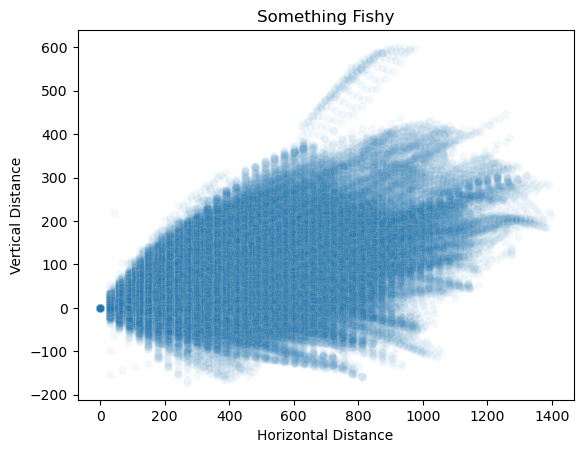

In [10]:
# plot horizontal vs vertical distance to hydrology
sns.scatterplot(data = df_combined, x = 'Horizontal_Distance_To_Hydrology', y = 'Vertical_Distance_To_Hydrology', alpha = 0.05)
plt.title('Something Fishy')
plt.xlabel('Horizontal Distance')
plt.ylabel('Vertical Distance')
plt.show()

### Exploratory Data Analysis

In [11]:
# a quick look at the structure of the data
df_combined.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,Aspen
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,Aspen
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,Lodgepole Pine
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,Lodgepole Pine
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,Aspen


To start, we are going to use all the available variables. This will give us the most data to work with to predict the tree cover type.

In [12]:
X.dtypes

Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type7                            int64
Soil_Type8                            int64
Soil_Type9                            int64
Soil_Type10                           int64
Soil_Type11                           int64
Soil_Type12                     

All variable datatypes are int64.

In [13]:
X[X.columns[:10]].describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000


Summary statistics for the first 10 columns (not the binary variables) are shown above.

### Correlation Matrix

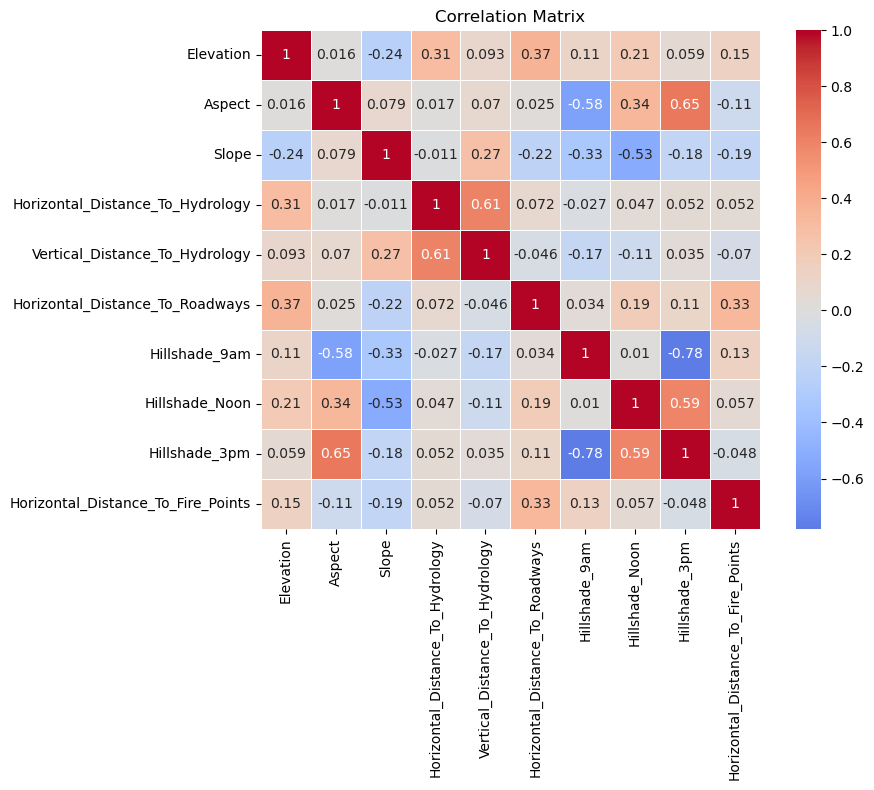

In [14]:
# correlation matrix of numeric columns

numeric_cols = [col for col in df_combined if not df_combined[col].isin([0, 1]).all() and col != 'Cover_Type']
corr_matrix = df_combined[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center = 0, square = True, linewidths = 0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

`Hillshade_3pm` and `Aspect` are moderately positively correlated, followed by `Hillshade_Noon` and `Hillshade_3pm`. `Hillshade_3pm` and `Hillshade_9pm` are strongly negatively correlated, followed by `Hillshade_9am` and `Aspect` and `Hillshade_Noon` and `Slope`.

### Boxplots

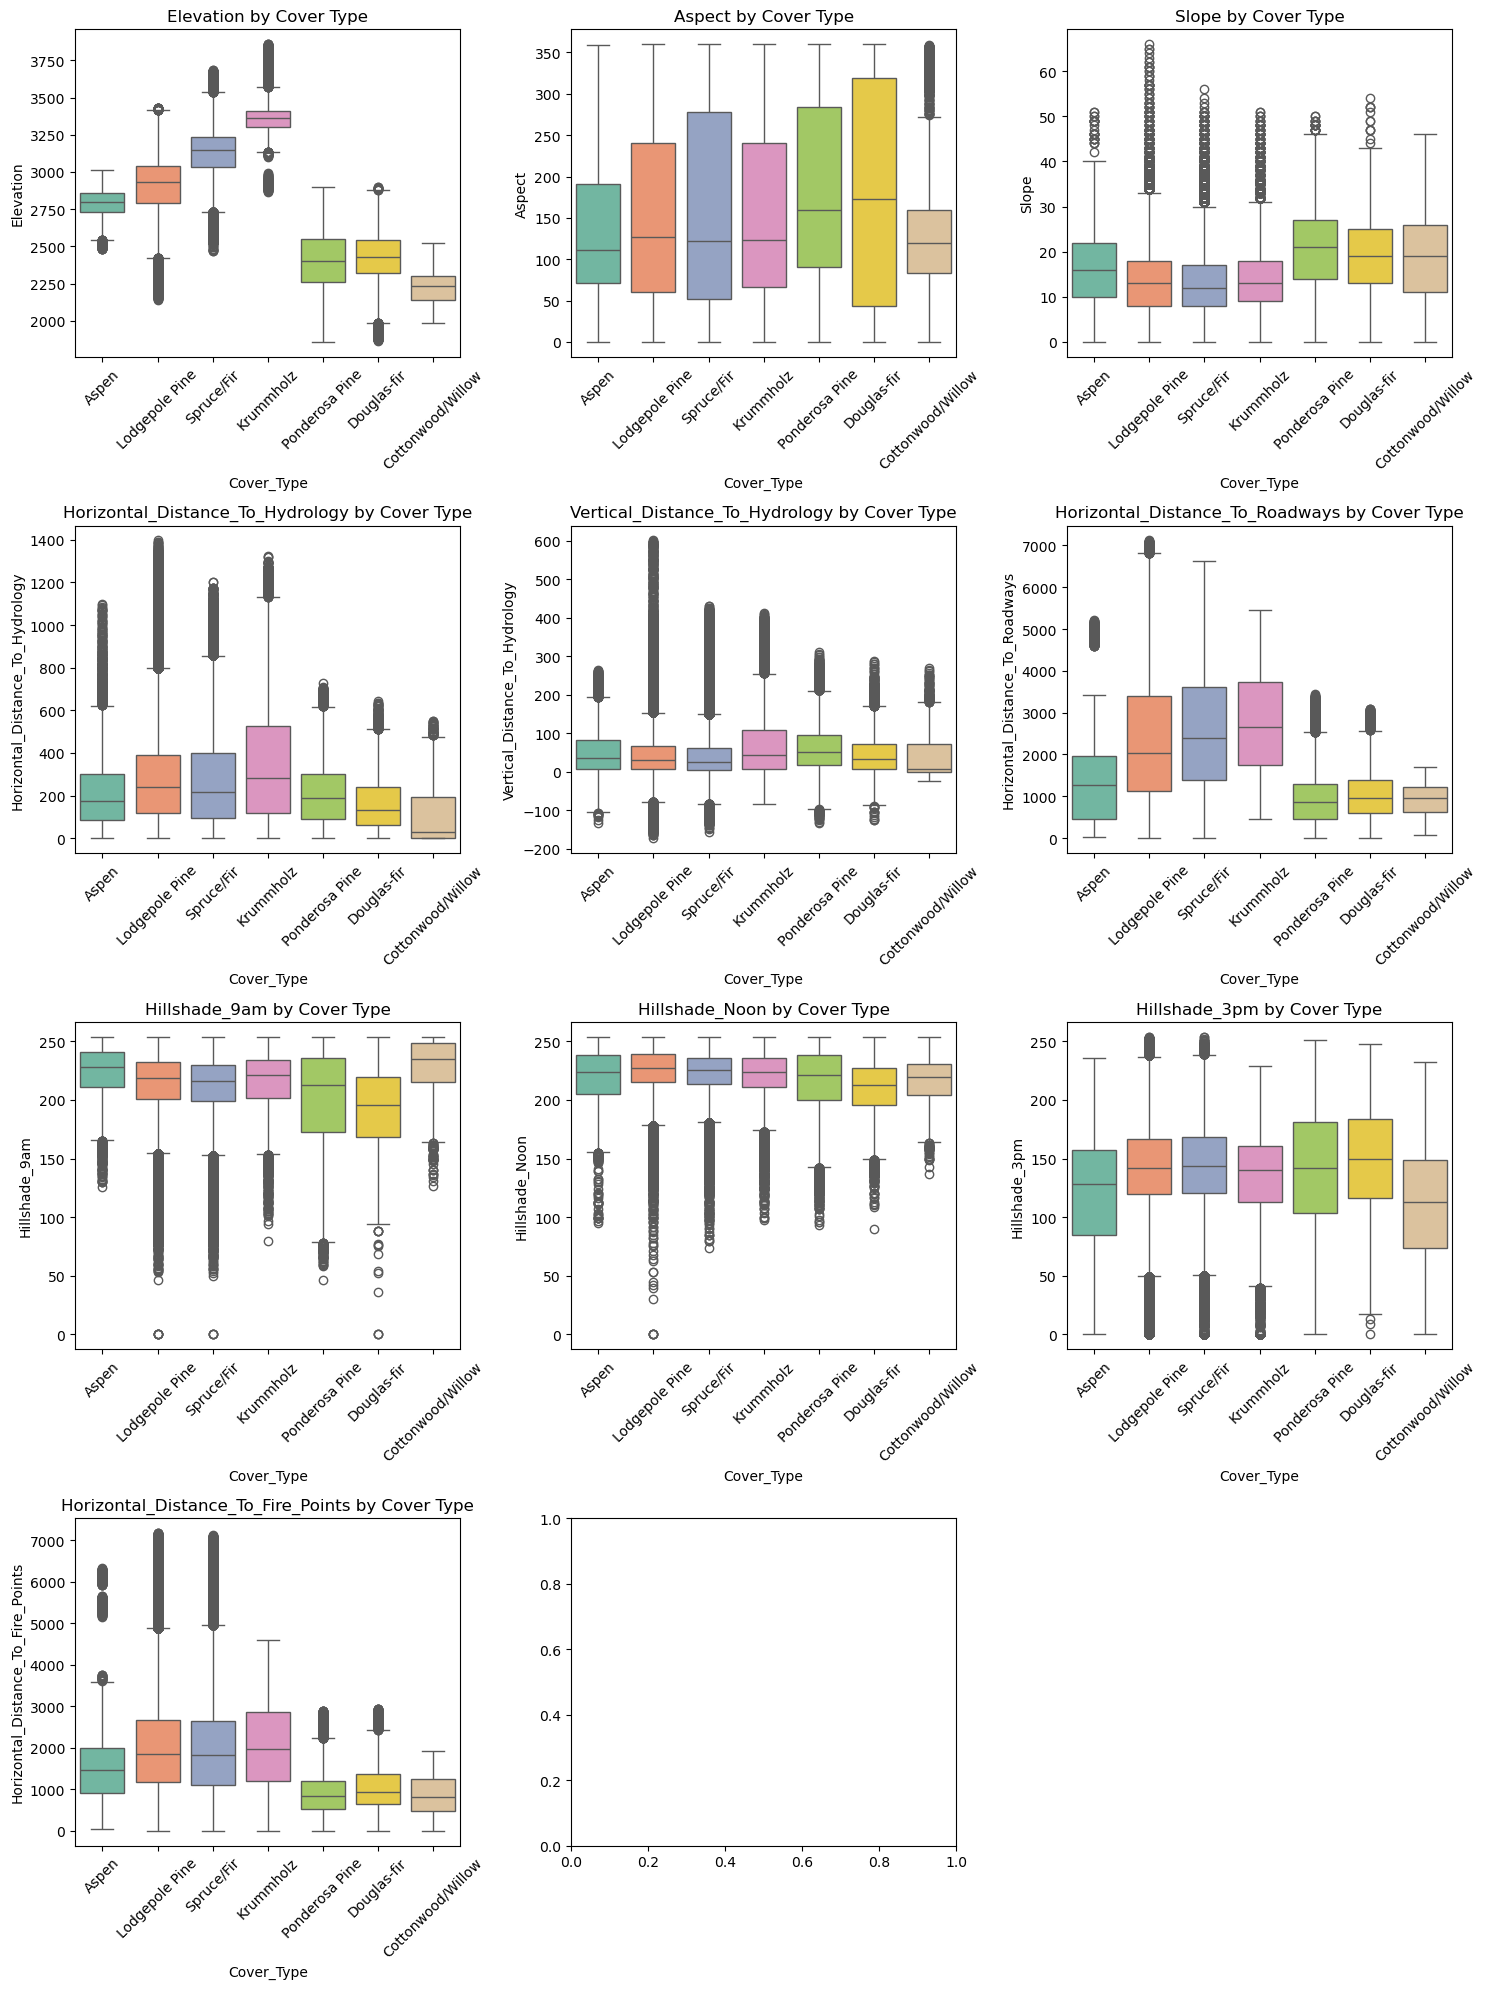

In [15]:
# use numeric_cols from above.
n_cols = len(numeric_cols)
n_rows = (n_cols + 2) // 3

fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5 * n_rows))

for i, col in enumerate(numeric_cols):
    sns.boxplot(data = df_combined, x = 'Cover_Type', y = col,
                ax = axes[i // 3, i % 3],
                palette = sns.color_palette("Set2", 7),
                hue = "Cover_Type",
                legend = False)
    axes[i // 3, i % 3].set_title(f'{col} by Cover Type')
    axes[i // 3, i % 3].tick_params(axis='x', labelrotation=45)

# we have one empty subplot so we hide it
axes[-1, -1].set_visible(False)

plt.tight_layout()
plt.show()

In [16]:
for column in X[X.columns[:10]]:
    print(X[column].values)

[2596 2590 2804 ... 2386 2384 2383]
[ 51  56 139 ... 159 170 165]
[ 3  2  9 ... 17 15 13]
[258 212 268 ...  60  60  60]
[ 0 -6 65 ...  7  5  4]
[ 510  390 3180 ...   90   90   67]
[221 220 234 ... 236 230 231]
[232 235 238 ... 241 245 244]
[148 151 135 ... 130 143 141]
[6279 6225 6121 ...  854  864  875]


Looking at the boxplots for the continuous variables, we believe that IQR is not a suitable measure for outliers. There are many data points that lie outside the 1.5IQR range. We will consider the outliers in our model.

Plotting Elevations against Cover Types, we can observe the quartile ranges in Elevation and other features that are characteristic of different Cover Types. Something to note is that most ranges contain some form of overlap between multiple Cover Types. For example, we observe that based on this diagram, features like horizontal or vertical distance to hydrology are unlikely to be helpful in distinguishing Cover Types.

### Histograms

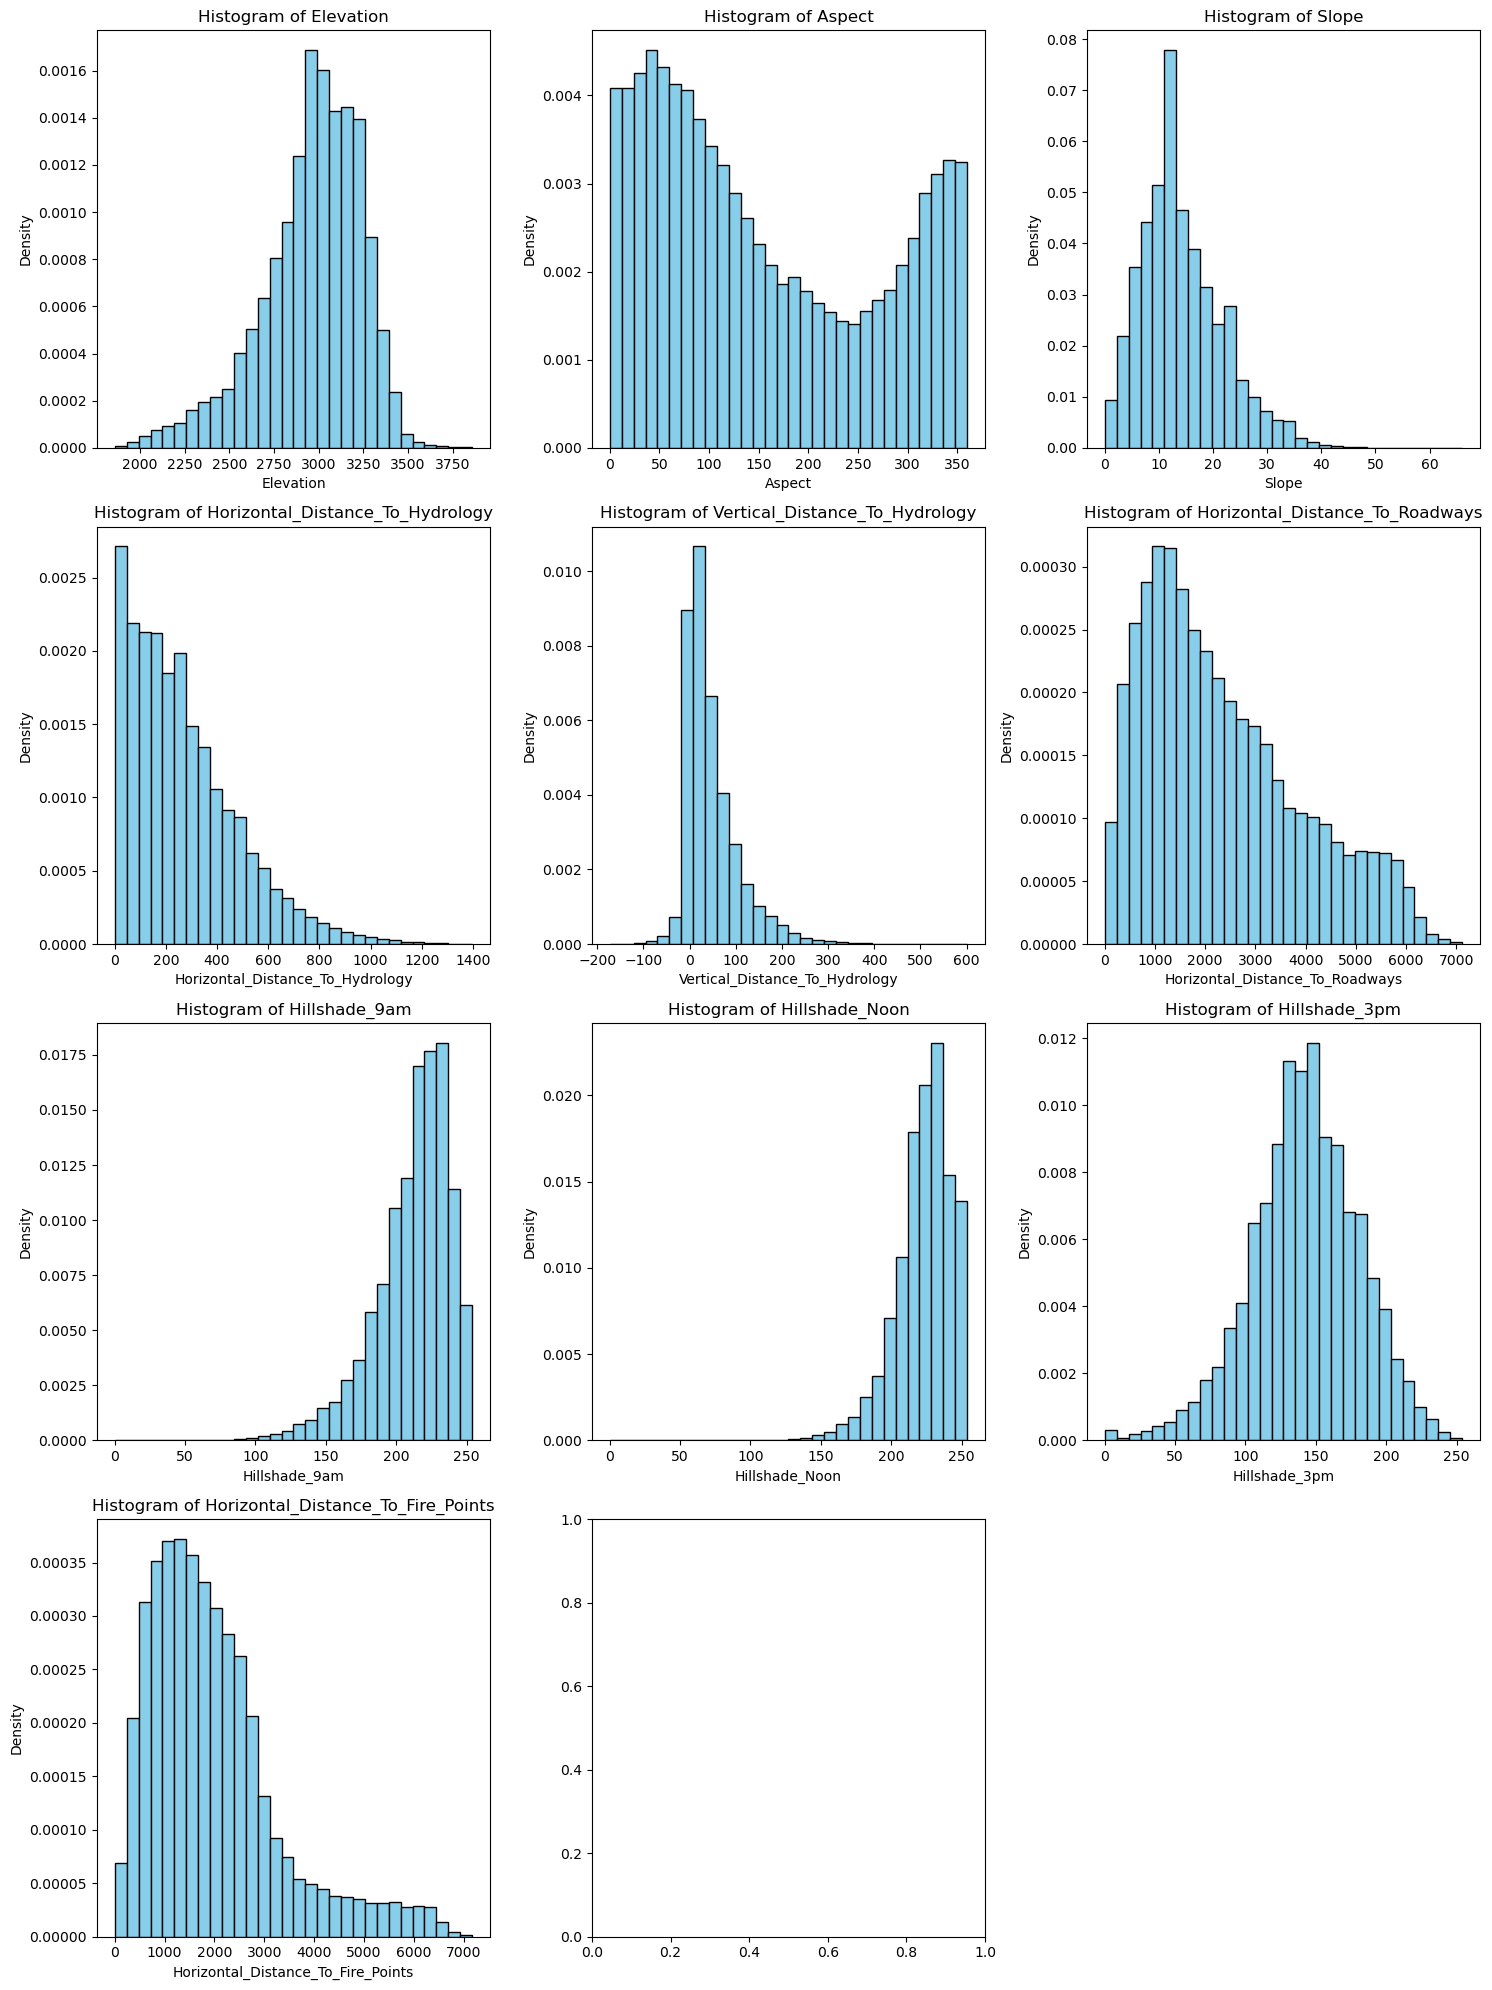

In [17]:
fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
  axes[i].hist(df_combined[col], bins = 30, color = 'skyblue', edgecolor = 'black', density = True)
  axes[i].set_title(f'Histogram of {col}')
  axes[i].set_xlabel(col)
  axes[i].set_ylabel('Density')

# we have one empty subplot so we hide it
axes[11].set_visible(False)

plt.tight_layout()
plt.show()

Some data is skewed, so we may need to consider log-transforming the data if it makes the model more effective.

### Class Balance

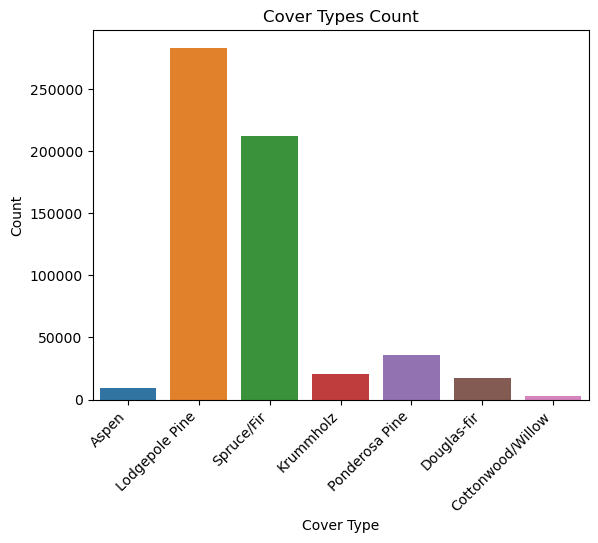

In [18]:
sns.countplot(x='Cover_Type', data=y, hue = 'Cover_Type')
plt.title('Cover Types Count')
plt.xlabel('Cover Type')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')
plt.show()

The most common target is cover type 2, and the least common is cover type 4, which has much less than the rest of the outcomes.

### Imbalanced Soil Data

In [19]:
for col in df_combined.loc[:, 'Wilderness_Area1':'Soil_Type40']:
    print(df_combined[col].value_counts())

Wilderness_Area1
0    320216
1    260796
Name: count, dtype: int64
Soil_Type1
0    577981
1      3031
Name: count, dtype: int64
Soil_Type2
0    573487
1      7525
Name: count, dtype: int64
Soil_Type3
0    576189
1      4823
Name: count, dtype: int64
Soil_Type4
0    568616
1     12396
Name: count, dtype: int64
Soil_Type5
0    579415
1      1597
Name: count, dtype: int64
Soil_Type6
0    574437
1      6575
Name: count, dtype: int64
Soil_Type7
0    580907
1       105
Name: count, dtype: int64
Soil_Type8
0    580833
1       179
Name: count, dtype: int64
Soil_Type9
0    579865
1      1147
Name: count, dtype: int64
Soil_Type10
0    548378
1     32634
Name: count, dtype: int64
Soil_Type11
0    568602
1     12410
Name: count, dtype: int64
Soil_Type12
0    551041
1     29971
Name: count, dtype: int64
Soil_Type13
0    563581
1     17431
Name: count, dtype: int64
Soil_Type14
0    580413
1       599
Name: count, dtype: int64
Soil_Type15
0    581009
1         3
Name: count, dtype: int64
Soil_Type16


There are some soil types that have very few counts.

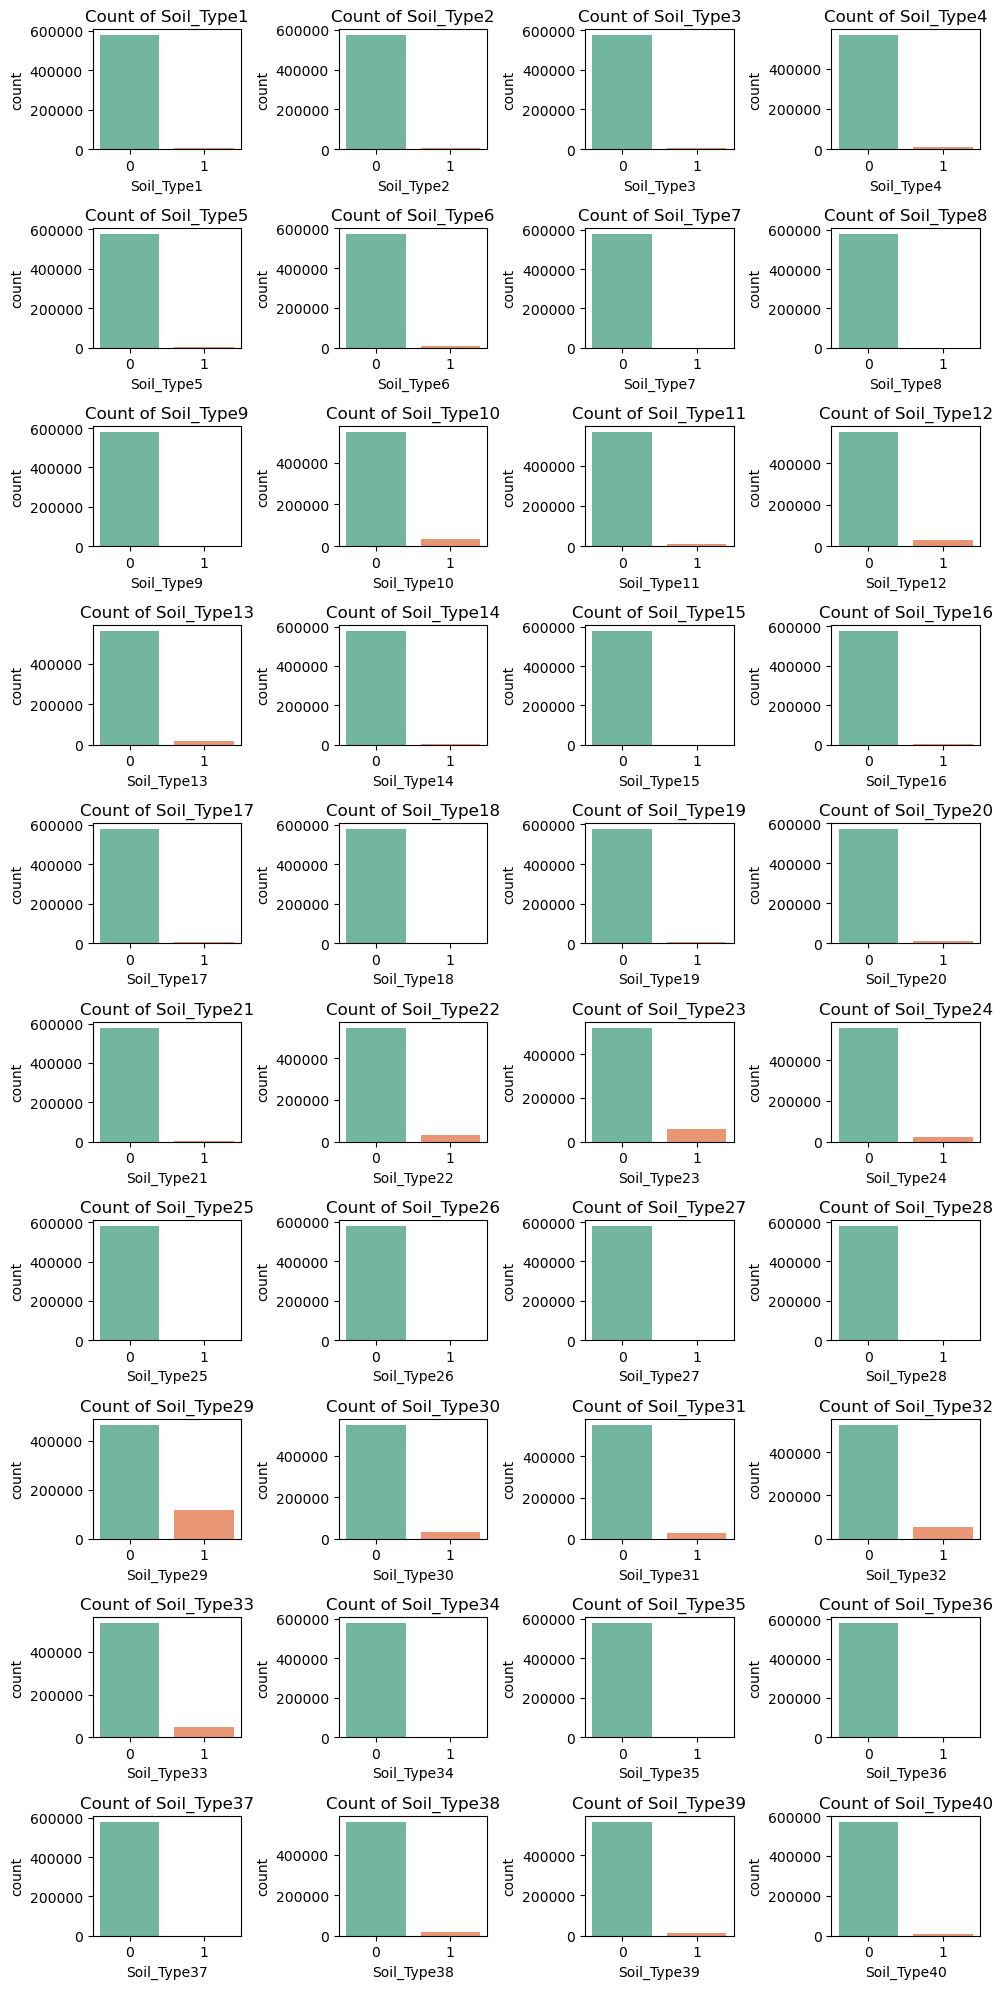

In [20]:
## 44 binary features (wilderness_areas and soil_types)
fig, axes = plt.subplots(10, 4, figsize=(10,20))
axes = axes.flatten()

soil_types = [col for col in df_combined if col.startswith('Soil_Type')]
for i, col in enumerate(soil_types):
  sns.countplot(x=col, data=df_combined, ax=axes[i], hue = col, palette = "Set2", legend = False)
  axes[i].set_title(f'Count of {col}')

plt.tight_layout()
plt.show()


**All** Soil_Types have a very uneven balance of presence/non-presence and are very sparse. For most soil types, 0 appears hundreds of thousands of times but 1 appears only a few thousand times.

### Wilderness Areas

Text(0.5, 1.0, '')

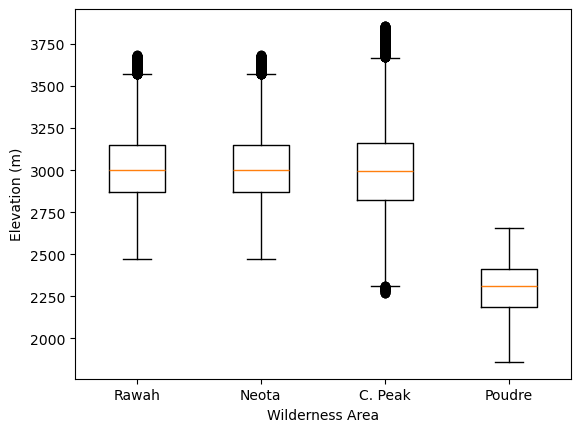

In [21]:
# See relevant distribution of different wilderness areas
# Rawah: Area 1
# Neota: Area 2
# Comanche Peak: Area 3 (Abbr. as C. Peak)
# Cache la Poudre: Area 4 (Abbr as Poudre)

rawah_idx = X["Wilderness_Area1"] == 1
X_rawah = X[rawah_idx]
y_rawah = y[rawah_idx]

neota_idx = X["Wilderness_Area2"] == 1
X_neota = X[rawah_idx]
y_neota = y[rawah_idx]

c_peak_idx = X["Wilderness_Area3"] == 1
X_c_peak = X[c_peak_idx]
y_c_peak = y[c_peak_idx]

poudre_idx = X["Wilderness_Area4"] == 1
X_poudre = X[poudre_idx]
y_poudre = y[poudre_idx]


fig, ax = plt.subplots()
ax.boxplot([X_rawah["Elevation"], X_neota["Elevation"], X_c_peak["Elevation"], X_poudre["Elevation"]], tick_labels = ["Rawah", "Neota", "C. Peak", "Poudre"])
ax.set_xlabel("Wilderness Area")
ax.set_ylabel("Elevation (m)")
ax.set_title("")

We note that most sites have about the same height, except for Poudre with a lower range of elevation. Maybe a possible correlation for trees at Poudre with water distance?

Text(0.5, 1.0, 'Cache la Poudre')

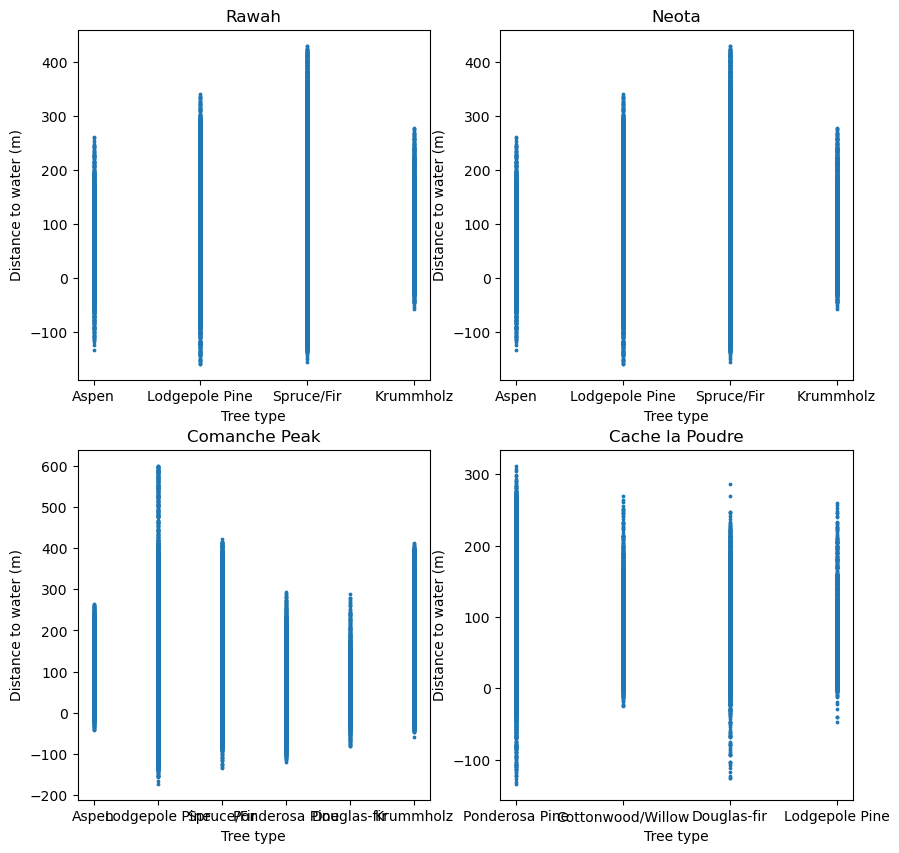

In [23]:
# Plot 2: Plot the distribution to water for each plant type, per site

fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 10))

ax[0, 0].scatter(y_rawah.values.flatten(), X_rawah["Vertical_Distance_To_Hydrology"], s = 3)
ax[0, 0].set_xlabel("Tree type")
ax[0, 0].set_ylabel("Distance to water (m)")
ax[0, 0].set_title("Rawah")
ax[0, 1].scatter(y_neota.values.flatten(), X_neota["Vertical_Distance_To_Hydrology"], s = 3)
ax[0, 1].set_xlabel("Tree type")
ax[0, 1].set_ylabel("Distance to water (m)")
ax[0, 1].set_title("Neota")
ax[1, 0].scatter(y_c_peak.values.flatten(), X_c_peak["Vertical_Distance_To_Hydrology"], s = 3)
ax[1, 0].set_xlabel("Tree type")
ax[1, 0].set_ylabel("Distance to water (m)")
ax[1, 0].set_title("Comanche Peak")
ax[1, 1].scatter(y_poudre.values.flatten(), X_poudre["Vertical_Distance_To_Hydrology"], s = 3)
ax[1, 1].set_xlabel("Tree type")
ax[1, 1].set_ylabel("Distance to water (m)")
ax[1, 1].set_title("Cache la Poudre")

Trees 3 and 6 are unique to Comanche Peak, and tree 4 is unique to Cache la Poudre.

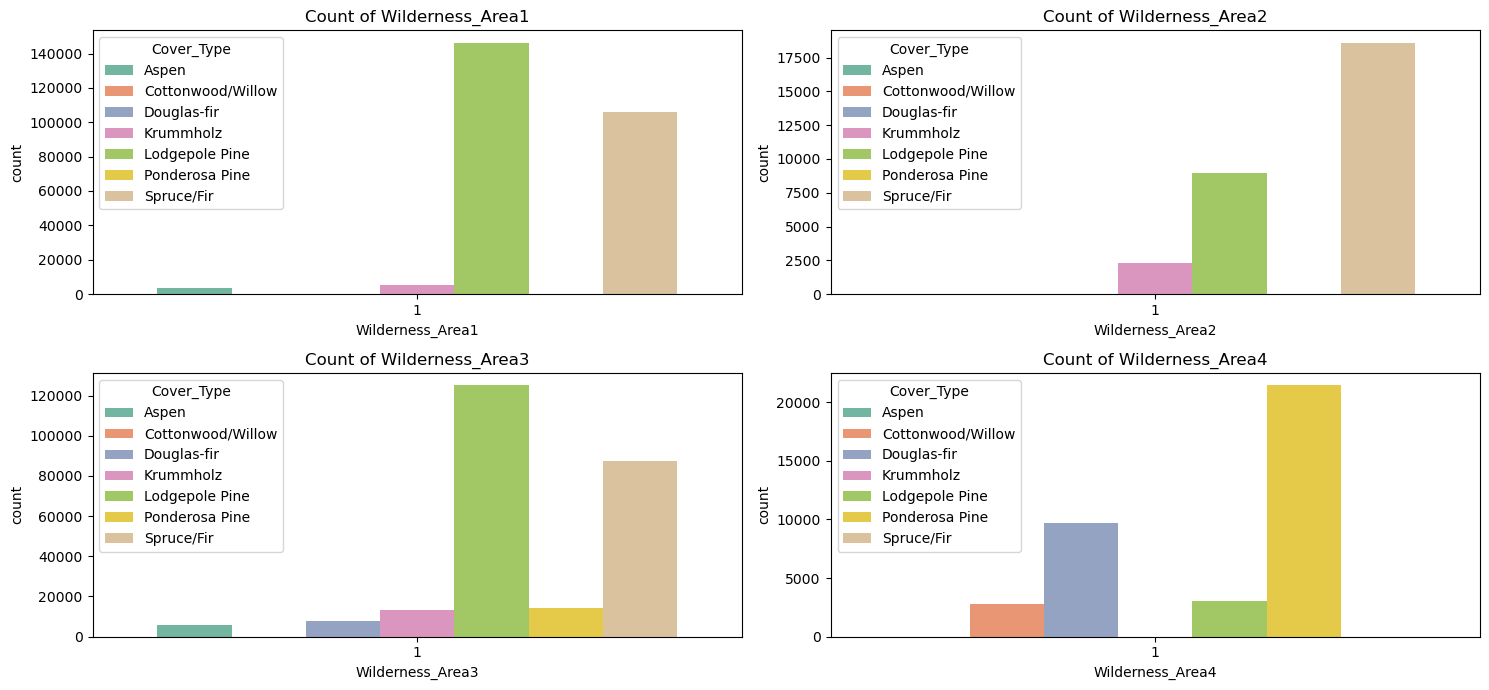

In [24]:
## 44 binary features (here is wilderness_areas)
cover_order = sorted(df_combined["Cover_Type"].unique())
fig, axes = plt.subplots(2, 2, figsize=(15, 7))
axes = axes.flatten()

wild_types = [col for col in df_combined if col.startswith('Wilderness_Area')]
for i, col in enumerate(wild_types):
  sns.countplot(x=col, data=df_combined[df_combined[col] == 1], ax=axes[i], hue = "Cover_Type", hue_order = cover_order, palette = "Set2")
  axes[i].set_title(f'Count of {col}')

plt.tight_layout()
plt.show()

These plots sho the count of certain cover types that appear in the presence of each wilderness area. It seems that wilderness area has a strong effect on the possible cover types that appear. This could be significant for many types of models.

## Random Forest

In [25]:
# split the train and test data with test size 20%. Set the random state to ensure reproducibility.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2025)

In [26]:
model = RandomForestClassifier(n_estimators=10, 
                               criterion= 'gini',  
                               verbose=3,
                               random_state = 2025)
model.fit(X_train.values, y_train.values)

# this model has 10 estimators with gini criterion. the model is fit using the training data.
# this model is using all the available features.

/Users/jessicayao/miniconda3/envs/dsu_app/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


building tree 1 of 10
building tree 2 of 10
building tree 2 of 10
building tree 3 of 10
building tree 3 of 10
building tree 4 of 10
building tree 4 of 10
building tree 5 of 10
building tree 5 of 10
building tree 6 of 10
building tree 6 of 10
building tree 7 of 10
building tree 7 of 10
building tree 8 of 10
building tree 8 of 10
building tree 9 of 10
building tree 9 of 10
building tree 10 of 10
building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    8.7s finished


RandomForestClassifier(n_estimators=10, random_state=2025, verbose=3)

In [27]:
# The training data has more accuracy than the testing data. 
# This indicates that the model may be overfitting the training data and 
# not generalizing as well as it could to unseen data, however the accuracy for
# the testing data is very high, at 94% accurate. Therefore, we are not too worried
# about overfitting having a large negative effect on our predictive accuracy.

y_pred_train = model.predict(X_train.values)
y_pred_test = model.predict(X_test.values)
# calculate accuracy
train_acc = accuracy_score(y_train, y_pred_train)
print("Training Accuracy:", train_acc)

test_acc = accuracy_score(y_test, y_pred_test)
print("Testing Accuracy:", test_acc)

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.3s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.1s finished


Training Accuracy: 0.9975774995750943
Testing Accuracy: 0.9433491390067382


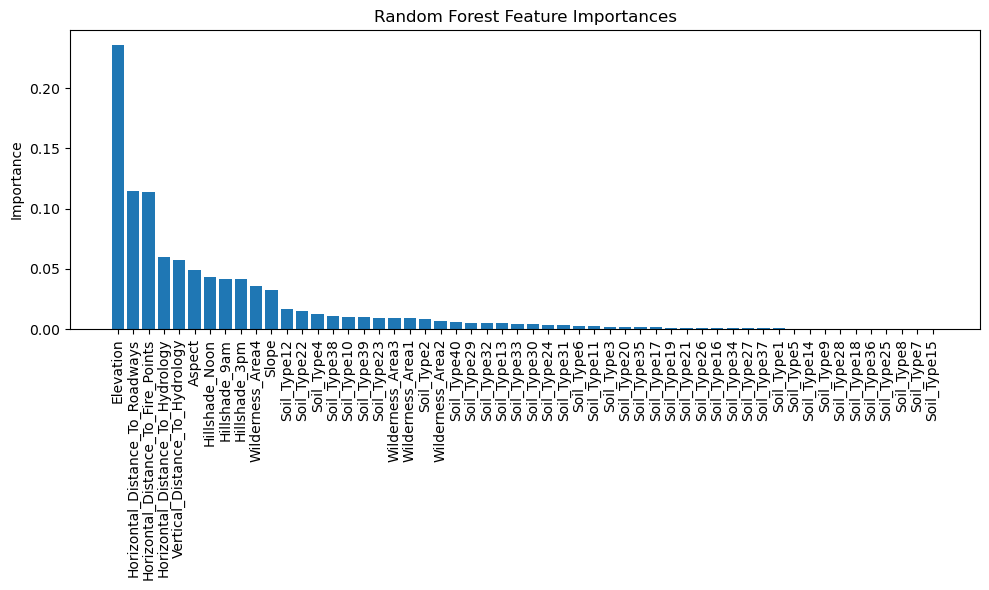

In [28]:
# This plot shows the feature importances for our initial model.
# We see that the soil type variables, per our guess in EDA, are the least important features.
# The most important features appear to be Elevation, 
# Horizontal Distance to Hydrology, and Vertical Distance to Hydrology.
# We can use this information to create a more efficient model that removes soil type features.

importances = model.feature_importances_
feature_names = X.columns

# Sort in descending order
idx = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[idx])
plt.xticks(range(len(importances)), feature_names[idx], rotation=90)
plt.ylabel("Importance")
plt.title("Random Forest Feature Importances")
plt.tight_layout()
plt.show()

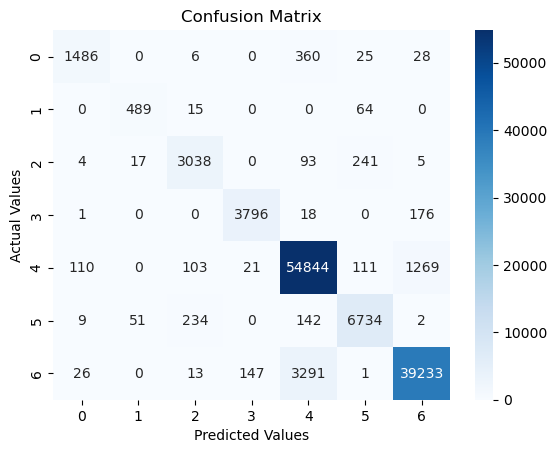

In [29]:
# Here is our confusion matrix for our testing data predictions vs the actual data.
# We see that a majority of values are being predicted correctly,
# with very high values along the diagonal. We are seeing high misclassifications for
# data points between cover type 0 and 1. This is related to the high number of data points
# in these two classes, which may be causing the model to misclassify them more often.
# other misclassifications include actual class 4 being predicted as class 1, and 
# actual class 5 being predicted as class 2.

cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.show()

In [30]:
print(classification_report(y_test, y_pred_test))

#here, we can see that the precision, reecall, and f1-scores
#are all very high across all classes, indicating strong model performance.
#the model is weakest at predicting class 5, with an f1-score of 0.81,
#with the lowest precision score of 0.91 with class 4 and the lowest recall
#score with class 5 at 0.72.
# we can see that the generally, the model is predicting well,
# with accuracy at 94% and weighted average f1-score of 0.94.

                   precision    recall  f1-score   support

            Aspen       0.91      0.78      0.84      1905
Cottonwood/Willow       0.88      0.86      0.87       568
      Douglas-fir       0.89      0.89      0.89      3398
        Krummholz       0.96      0.95      0.95      3991
   Lodgepole Pine       0.93      0.97      0.95     56458
   Ponderosa Pine       0.94      0.94      0.94      7172
       Spruce/Fir       0.96      0.92      0.94     42711

         accuracy                           0.94    116203
        macro avg       0.92      0.90      0.91    116203
     weighted avg       0.94      0.94      0.94    116203



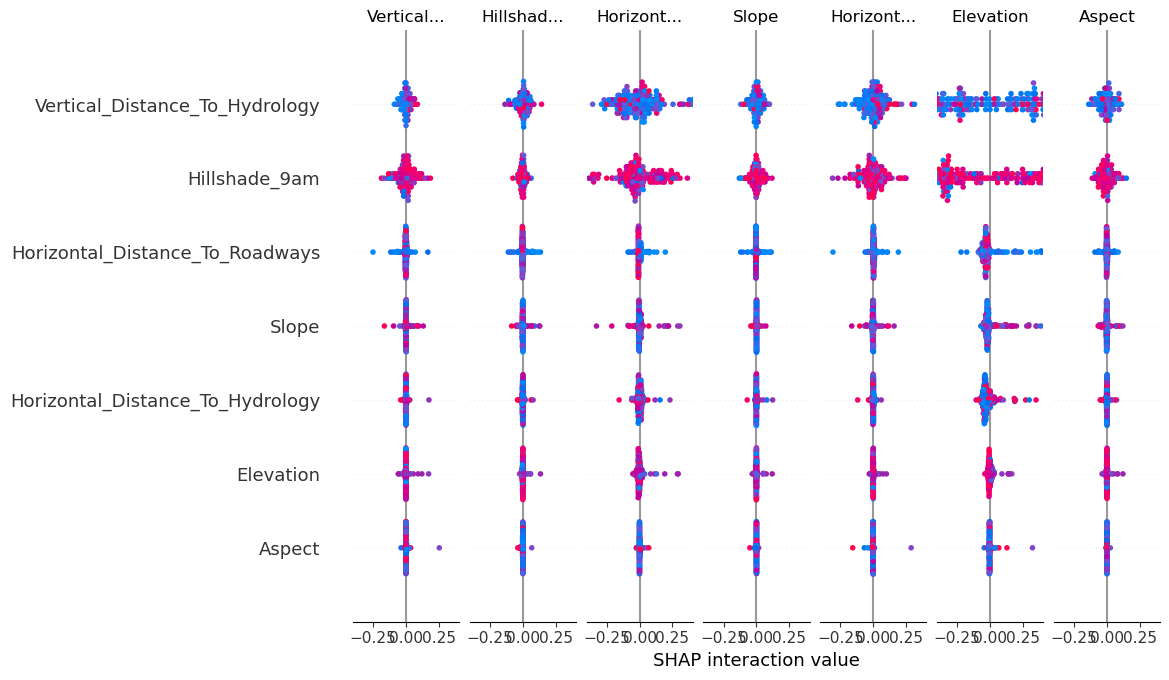

In [31]:
background = shap.sample(X_train, 200, random_state=42)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(background)
shap.summary_plot(shap_values, background)

#lowkey this is chatgpt spitting it out to me. I actually don't really know what this is but... okay...
#maybe confirm with gemini and claude before taking this as truth


#this plot shows how pairs of features impact the random forest predictions. 
# a wide spread of points along the x-axis per feature pair means that
#there is important interaction between the variables, while a narrow spread 
# means that there is little to no interaction.
# Additionally, red points indicate higher feature values, while blue points indicate lower feature values.
# A farther distance from zero means stronger interactions between the features.

# We can see that elevation and horizontal_distance_to_roadways have a strong interaction.
# Specifically, since the blue values are clustered closer to the center and the red values farther away,
# we know that low elevation values do not strongly interact with horizontal distance to roadways. 
# We can also see that elevation and aspect have the strongest interactions overall.


### Removing soil type variables

In [32]:
# because soils are not important features, we can drop them and create a new model.

soils = [f"Soil_Type{i}" for i in range(1, 41)]
X_subset = X.drop(columns = soils)

In [33]:
X_subset_train, X_subset_test, y_subset_train, y_subset_test = train_test_split(X_subset, 
                                                                  y, 
                                                                  test_size = 0.2, 
                                                                  random_state = 2025)

In [34]:
model_subset = RandomForestClassifier(n_estimators=10, 
                               criterion= 'gini',  
                               verbose=3,
                               random_state = 2025)
model_subset.fit(X_subset_train.values, y_subset_train.values)

# again, the model is using 10 estimators with gini criterion and 
# the random state is set for reproducibility.

/Users/jessicayao/miniconda3/envs/dsu_app/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


building tree 1 of 10
building tree 2 of 10
building tree 2 of 10
building tree 3 of 10
building tree 3 of 10
building tree 4 of 10
building tree 4 of 10
building tree 5 of 10
building tree 5 of 10
building tree 6 of 10
building tree 6 of 10
building tree 7 of 10
building tree 7 of 10
building tree 8 of 10
building tree 8 of 10
building tree 9 of 10
building tree 9 of 10
building tree 10 of 10
building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    6.8s finished


RandomForestClassifier(n_estimators=10, random_state=2025, verbose=3)

In [35]:
y_subset_pred_train = model_subset.predict(X_subset_train.values)
y_subset_pred_test = model_subset.predict(X_subset_test.values)
# calculate accuracy
train_acc = accuracy_score(y_subset_train, y_subset_pred_train)
print("Training Accuracy:", train_acc)

test_acc = accuracy_score(y_subset_test, y_subset_pred_test)
print("Testing Accuracy:", test_acc)

# Again, we see that training accuracy is higher than testing accuracy,
# but the testing accuracy is very high at 0.94. Thus, removing the soil features
# did not significantly impact model predictions and make them less accurate.

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s finished


Training Accuracy: 0.9975839538391038
Testing Accuracy: 0.9384611412786245


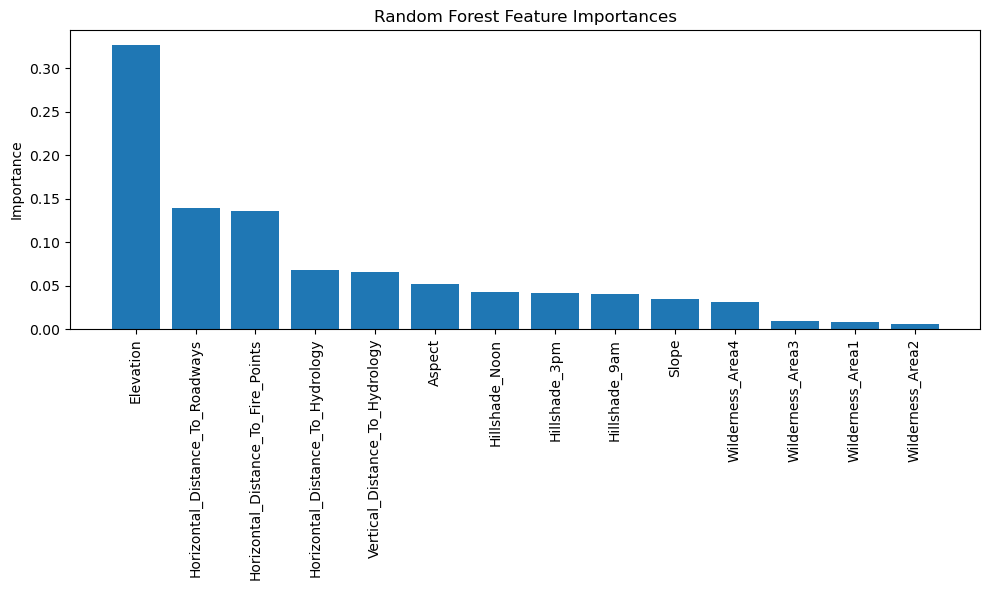

In [36]:
#here are the feature importances for the new model without soil features.
#We can see that the strongest predictors are still elevation, horizontal distance to roadways,
# and horizontal distance to fire points. The weakest predictors are the wildnerness area one-hot
# encoded variables, along with slope.

importances = model_subset.feature_importances_
feature_names = X_subset.columns

# Sort in descending order
idx = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[idx])
plt.xticks(range(len(importances)), feature_names[idx], rotation=90)
plt.ylabel("Importance")
plt.title("Random Forest Feature Importances")
plt.tight_layout()
plt.show()

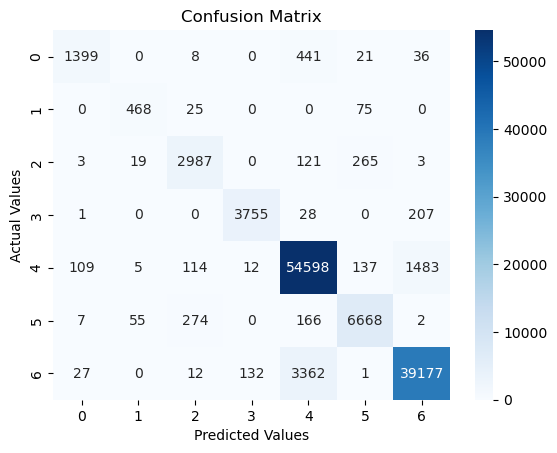

In [37]:
# we see the same pattern in this confusion matrix as the original model.
# the diagonal values are the highest, which means that the model is good at prediction.
# The most commonly misclassified tree cover types are 0 and 1. Next most misclassified
# are the actual value 4 being classified as 1 and the actual value 5 being classified as 2.

cm = confusion_matrix(y_subset_test, y_subset_pred_test)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.show()

In [38]:
print(classification_report(y_subset_test, y_subset_pred_test))

# in this classification report, we see that the evaluation metrics are 
# still pretty good, even with the soil types removed. The lowest precision score
# is tied between class 3 and class 6, while the lowest recall score is still class 5.
# The lowest f1-score is still class 5. The accuracy and weighted average f1-score have not decreased
# significantly, which means that the model is still predicting well.

                   precision    recall  f1-score   support

            Aspen       0.90      0.73      0.81      1905
Cottonwood/Willow       0.86      0.82      0.84       568
      Douglas-fir       0.87      0.88      0.88      3398
        Krummholz       0.96      0.94      0.95      3991
   Lodgepole Pine       0.93      0.97      0.95     56458
   Ponderosa Pine       0.93      0.93      0.93      7172
       Spruce/Fir       0.96      0.92      0.94     42711

         accuracy                           0.94    116203
        macro avg       0.92      0.88      0.90    116203
     weighted avg       0.94      0.94      0.94    116203



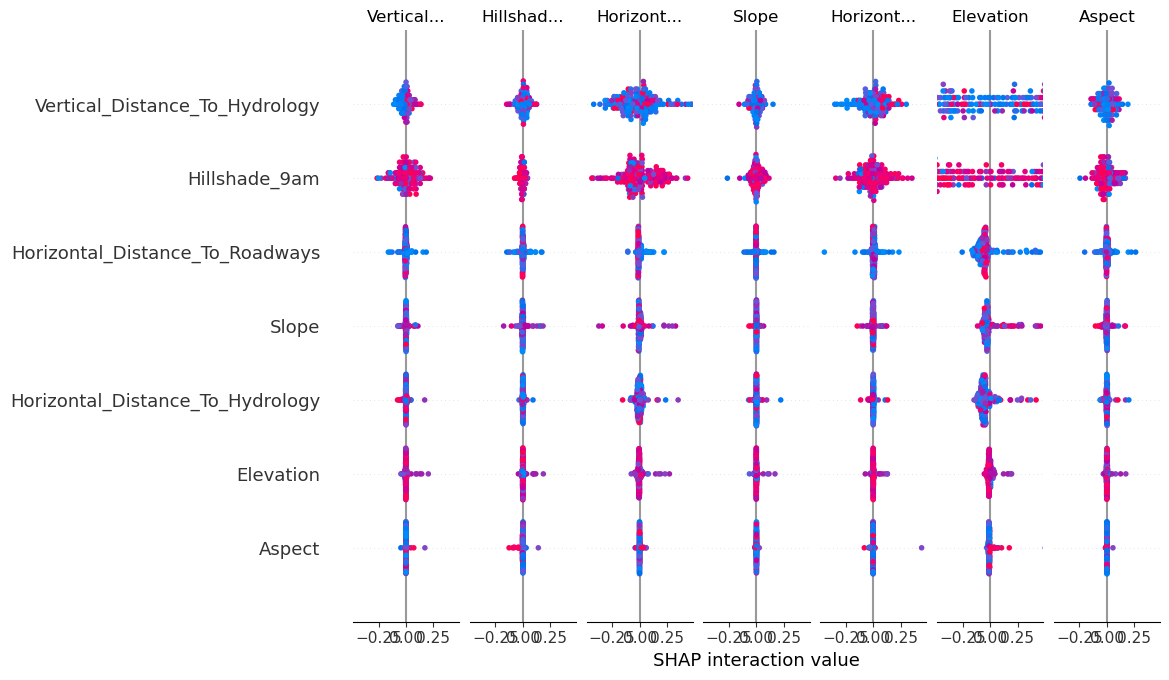

In [39]:
background = shap.sample(X_subset_train, 200, random_state=42)
explainer = shap.TreeExplainer(model_subset)
shap_values = explainer.shap_values(background)
shap.summary_plot(shap_values, background)

# this plot shows a similar pattern to the previous SHAP summary plot.
# Elevation and aspect have strong interactions with most other variables.


In [40]:
model_subset_large = RandomForestClassifier(n_estimators=100, 
                               criterion= 'gini',  
                               verbose=3,
                               random_state = 2025)
model_subset_large.fit(X_subset_train.values, y_subset_train.values)

#here, we are testing if the model improves with more estimators.
# this model uses 100 estimators.

/Users/jessicayao/miniconda3/envs/dsu_app/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


building tree 1 of 100
building tree 2 of 100
building tree 2 of 100
building tree 3 of 100
building tree 3 of 100
building tree 4 of 100
building tree 4 of 100
building tree 5 of 100
building tree 5 of 100
building tree 6 of 100
building tree 6 of 100
building tree 7 of 100
building tree 7 of 100
building tree 8 of 100
building tree 8 of 100
building tree 9 of 100
building tree 9 of 100
building tree 10 of 100
building tree 10 of 100
building tree 11 of 100
building tree 11 of 100
building tree 12 of 100
building tree 12 of 100
building tree 13 of 100
building tree 13 of 100
building tree 14 of 100
building tree 14 of 100
building tree 15 of 100
building tree 15 of 100
building tree 16 of 100
building tree 16 of 100
building tree 17 of 100
building tree 17 of 100
building tree 18 of 100
building tree 18 of 100
building tree 19 of 100
building tree 19 of 100
building tree 20 of 100
building tree 20 of 100
building tree 21 of 100
building tree 21 of 100
building tree 22 of 100
building 

[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:   20.7s


building tree 32 of 100
building tree 33 of 100
building tree 33 of 100
building tree 34 of 100
building tree 34 of 100
building tree 35 of 100
building tree 35 of 100
building tree 36 of 100
building tree 36 of 100
building tree 37 of 100
building tree 37 of 100
building tree 38 of 100
building tree 38 of 100
building tree 39 of 100
building tree 39 of 100
building tree 40 of 100
building tree 40 of 100
building tree 41 of 100
building tree 41 of 100
building tree 42 of 100
building tree 42 of 100
building tree 43 of 100
building tree 43 of 100
building tree 44 of 100
building tree 44 of 100
building tree 45 of 100
building tree 45 of 100
building tree 46 of 100
building tree 46 of 100
building tree 47 of 100
building tree 47 of 100
building tree 48 of 100
building tree 48 of 100
building tree 49 of 100
building tree 49 of 100
building tree 50 of 100
building tree 50 of 100
building tree 51 of 100
building tree 51 of 100
building tree 52 of 100
building tree 52 of 100
building tree 53

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.2min finished


RandomForestClassifier(random_state=2025, verbose=3)

In [41]:
y_subset_large_pred_train = model_subset_large.predict(X_subset_train.values)
y_subset_large_pred_test = model_subset_large.predict(X_subset_test.values)
# calculate accuracy
train_acc = accuracy_score(y_subset_train, y_subset_large_pred_train)
print("Training Accuracy:", train_acc)

test_acc = accuracy_score(y_subset_test, y_subset_large_pred_test)
print("Testing Accuracy:", test_acc)

print(classification_report(y_subset_test, y_subset_large_pred_test))

# as we can see from the training and testing accuracies, the model did not improve
# significantly with more estimators. The accuracies are nearly identical to the previous model.
# The accuracy is less than a percent higher for both training and testing data.
# However, the classification report shows that the precision, recall, and f1-scores
# have improved significantly across the classes. Specifically, the lowest precision, recall, and f1-scores
# have improved over the previous model, with a 0.04 increase in f1-score for class 5 and a 0.05 increase 
# in recall score for class 5.
# The accuracy and weighted average f1-score are pretty similar from the previous model.
# Therefore, we can conclude that the model with only 10 estimators is the best for our needs,
# since the predictive power is pretty similar but the model is faster to train and much more 
# computationally efficient to use.

[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:    4.9s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   11.7s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   11.7s finished
[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.4s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.4s finished


Training Accuracy: 1.0
Testing Accuracy: 0.9520924588866037
                   precision    recall  f1-score   support

            Aspen       0.94      0.72      0.82      1905
Cottonwood/Willow       0.89      0.82      0.86       568
      Douglas-fir       0.93      0.89      0.91      3398
        Krummholz       0.98      0.95      0.96      3991
   Lodgepole Pine       0.95      0.97      0.96     56458
   Ponderosa Pine       0.94      0.96      0.95      7172
       Spruce/Fir       0.96      0.94      0.95     42711

         accuracy                           0.95    116203
        macro avg       0.94      0.89      0.92    116203
     weighted avg       0.95      0.95      0.95    116203

                   precision    recall  f1-score   support

            Aspen       0.94      0.72      0.82      1905
Cottonwood/Willow       0.89      0.82      0.86       568
      Douglas-fir       0.93      0.89      0.91      3398
        Krummholz       0.98      0.95      0.96   

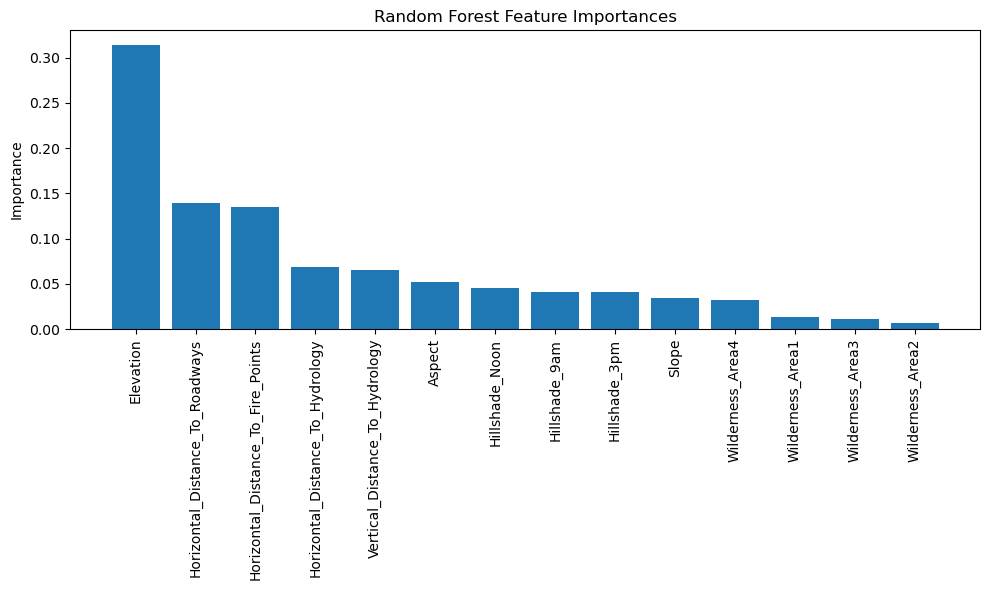

In [42]:
importances = model_subset_large.feature_importances_
feature_names = X_subset.columns

# Sort in descending order
idx = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[idx])
plt.xticks(range(len(importances)), feature_names[idx], rotation=90)
plt.ylabel("Importance")
plt.title("Random Forest Feature Importances")
plt.tight_layout()
plt.show()

# The feature importances are the same as the previous model with 10 estimators.
# The most important features are still elevation, horizontal distance to roadways,
# and horizontal distance to fire points. The least important features are still
# the wilderness area one-hot encoded variables.

# Appendix Code

## Regression

In [43]:
X.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Soil_Type1',
       'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6',
       'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11',
       'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15',
       'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19',
       'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23',
       'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27',
       'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31',
       'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35',
       'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39',
       'Soil_Type40', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4

In [44]:
X.corr()["Horizontal_Distance_To_Hydrology"].sort_values()

Soil_Type23                          -0.132244
Wilderness_Area4                     -0.100433
Wilderness_Area1                     -0.097124
Soil_Type20                          -0.078088
Soil_Type10                          -0.071653
Soil_Type17                          -0.071435
Soil_Type16                          -0.067448
Soil_Type22                          -0.051424
Soil_Type30                          -0.049960
Soil_Type4                           -0.049071
Soil_Type19                          -0.043236
Soil_Type3                           -0.041211
Soil_Type21                          -0.039953
Soil_Type14                          -0.038478
Soil_Type1                           -0.035096
Hillshade_9am                        -0.027088
Soil_Type9                           -0.021935
Soil_Type18                          -0.013340
Soil_Type6                           -0.012916
Soil_Type2                           -0.011569
Slope                                -0.010607
Soil_Type5   

Our response variable will be Horizontal_Distance_To_Hydrology. We will be using Elevation and Vertical_Distance_To_Hydrology to predict the response variable because they have the highest correlation with our response variable.

Text(0, 0.5, 'Vertical_Distance_To_Hydrology (m)')

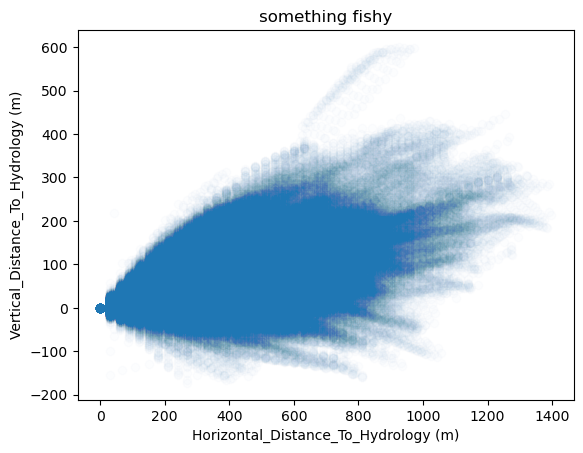

In [45]:
plt.scatter(X["Horizontal_Distance_To_Hydrology"], X["Vertical_Distance_To_Hydrology"], alpha=0.01)
plt.title("something fishy")
plt.xlabel("Horizontal_Distance_To_Hydrology (m)")
plt.ylabel("Vertical_Distance_To_Hydrology (m)")

In [46]:
# regression predictors and response
X_reg = X[["Elevation", "Vertical_Distance_To_Hydrology"]]
y_reg = X[["Horizontal_Distance_To_Hydrology"]]

# normalize values
X_reg = (X_reg - X_reg.min()) / (X_reg.max() - X_reg.min())
y_reg = (y_reg - y_reg.min()) / (y_reg.max() - y_reg.min())

# train test split
X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size = 0.2)

In [47]:
# linear regression model training
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# train evaluation metrics
mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

# test evaluation metrics
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

In [48]:
print(np.round(mse_train, 5), np.round(mse_test, 5))
print(np.round(mae_train, 5), np.round(mae_test, 5))
print(np.round(r2_train, 5), np.round(r2_test, 5))

0.0132 0.01313
0.08726 0.08703
0.42953 0.43386


Previous evaluation metrics with unnormalized data resulted in values that were rather hard to interpret. After normalization, we have a much better idea of how our model performs. The training and test metrics are roughly the same, which indicates that the model is not overfitting.

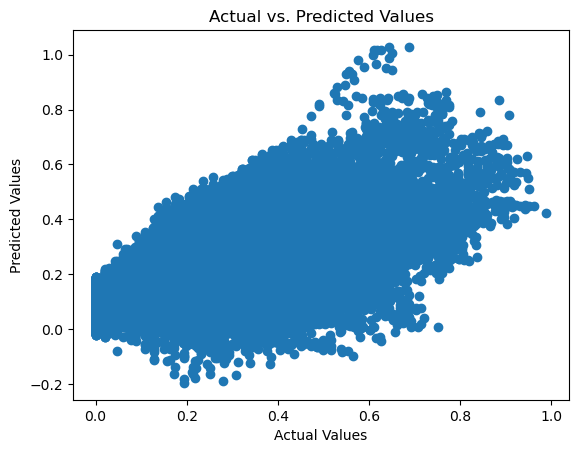

In [49]:
plt.scatter(y_test, y_pred_test)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

### Cross Validation

In [50]:
# dummy data
X_dummy, y_dummy = make_regression(n_samples=10, n_features=2, noise=0.1)
print("Features (X):\n", X_dummy)
print("Target (y):\n", y_dummy)

Features (X):
 [[ 0.6406709   1.10220233]
 [-0.24161353 -1.04647983]
 [ 0.79141515  0.22298215]
 [-0.72325583 -0.51138822]
 [-0.99891344  2.13133065]
 [ 0.66826069  1.52552099]
 [ 0.09200577  1.42647241]
 [-0.72212603 -1.0826258 ]
 [-1.15652602  0.62475218]
 [ 1.01854019  1.32359966]]
Target (y):
 [ 162.52332267 -121.91575784   91.31688144 -112.95382141  116.59420432
  205.65348273  145.05651871 -167.78380116  -42.1117748   216.93246854]


In [51]:
# K-Fold Cross Validation
print("\nK-Fold Cross Validation")
kf = KFold(n_splits=5)  # Splitting the data into 5 folds
for train_index, test_index in kf.split(X_dummy):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_dummy_train, X_dummy_test = X_dummy[train_index], X_dummy[test_index]
    y_dummy_train, y_dummy_test = y_dummy[train_index], y_dummy[test_index]

# Using cross_validate function for K-Fold
# lr = Lasso()
kf_results = cross_validate(model, X_dummy, y_dummy, cv=5, scoring='neg_mean_squared_error', return_estimator=True)
print("K-Fold Test Scores (MSE):", kf_results["test_score"])


K-Fold Cross Validation
TRAIN: [2 3 4 5 6 7 8 9] TEST: [0 1]
TRAIN: [0 1 4 5 6 7 8 9] TEST: [2 3]
TRAIN: [0 1 2 3 6 7 8 9] TEST: [4 5]
TRAIN: [0 1 2 3 4 5 8 9] TEST: [6 7]
TRAIN: [0 1 2 3 4 5 6 7] TEST: [8 9]
K-Fold Test Scores (MSE): [-0.00604312 -0.00355909 -0.0167066  -0.00725654 -0.01893477]


In [52]:
mse_scores = -kf_results["test_score"]
print("Adjusted MSE scores:", mse_scores)
print("Mean MSE:", mse_scores.mean())


Adjusted MSE scores: [0.00604312 0.00355909 0.0167066  0.00725654 0.01893477]
Mean MSE: 0.010500024211853283


The MSE of the model using the training dataset is 0.013. The MSE of the cross validation results average to 0.014. Since the MSE of the cross validation is generally the same as the MSE of the model, the model is generalizing well.

### Feature Importance

In [53]:
coefs = model.coef_[0]
features = ["Elevation", "Vertical_Distance_To_Hydrology"]

coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefs,
    'Absolute Coefficient': np.abs(coefs)
})
coef_df = coef_df.sort_values(by='Absolute Coefficient', ascending=False)
coef_df

,Feature,Coefficient,Absolute Coefficient
1,Vertical_Distance_To_Hydrology,1.176989,1.176989
0,Elevation,0.273232,0.273232


We found the standardized coefficient values which tells us the variable importance for each feature. Vertical_Distance_To_Hydrology was a much more important feature, with a coefficient of 1.177, while Elevation only had a coefficient of 0.274.

### Regularization technique

In [54]:
# We will pick ridge regression as the regularization technique
from sklearn.linear_model import Ridge

alpha_list = [0, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  print("alpha: " + str(alpha))
  ridge_model = Ridge(alpha = alpha)

  ridge_model.fit(X_train, y_train)
  y_pred_train_ridge = ridge_model.predict(X_train)
  y_pred_test_ridge = ridge_model.predict(X_test)

  # train evaluation metrics
  mse_train = mean_squared_error(y_train, y_pred_train_ridge)
  mae_train = mean_absolute_error(y_train, y_pred_train_ridge)
  r2_train = r2_score(y_train, y_pred_train_ridge)

  # test evaluation metrics
  mse_test = mean_squared_error(y_test, y_pred_test_ridge)
  mae_test = mean_absolute_error(y_test, y_pred_test_ridge)
  r2_test = r2_score(y_test, y_pred_test_ridge)

  print(np.round(mse_train, 5), np.round(mse_test, 5))
  print(np.round(mae_train, 5), np.round(mae_test, 5))
  print(np.round(r2_train, 5), np.round(r2_test, 5))

alpha: 0
0.0132 0.01313
0.08726 0.08703
0.42953 0.43386
alpha: 0.01
0.0132 0.01313
0.08726 0.08703
0.42953 0.43386
alpha: 0.1
0.0132 0.01313
0.08726 0.08703
0.42953 0.43386
alpha: 1
0.0132 0.01313
0.08726 0.08704
0.42953 0.43386
alpha: 10
0.0132 0.01313
0.08728 0.08705
0.42953 0.43385
alpha: 100
0.01321 0.01314
0.08748 0.08725
0.42908 0.43337
0.0132 0.01313
0.08726 0.08703
0.42953 0.43386
alpha: 0.01
0.0132 0.01313
0.08726 0.08703
0.42953 0.43386
alpha: 0.1
0.0132 0.01313
0.08726 0.08703
0.42953 0.43386
alpha: 1
0.0132 0.01313
0.08726 0.08704
0.42953 0.43386
alpha: 10
0.0132 0.01313
0.08728 0.08705
0.42953 0.43385
alpha: 100
0.01321 0.01314
0.08748 0.08725
0.42908 0.43337


For this regression problem, the ridge regression is almost identical to the ODS. alpha does not affect the final results too much.

## Logistic Regression

We will make a classification model to predict if a certain observation from cartographic variables comes from wilderness area type Rawah (area 1) or Comanche Peak (area 3).

By subsetting the dataset to only include rows with wilderness area 1 and 3, We will use Wilderness_Area1 as the binary response variable. If Wilderness_Area1 is 1, the observation is from Rawah. If Wilderness_Area1 is 0, the observation is from Comanche Peak.

**How was logistic regression analysis applied in your project?**

We applied logistic regression to a binary classification task distinguising Wilderness Area 1 (Rawah) from Area 3 (Comanche Peak). These two areas differ in topography and use context, so identifying which types of measures/predictors separate them can help planning and resource allocation. We also focused on these two areas because they have relatively equal sample sizes in the data, and there would be no class imbalance.

We trained a logistic regression model using an 80/20 train/test split and evaluated accuracy, precision, recall, a confusion matrix, and AUC/ROC.

In [89]:
# check wilderness area sizes
wilderness_area = X[["Wilderness_Area1", "Wilderness_Area2", "Wilderness_Area3", "Wilderness_Area4"]]
wilderness_area.sum()

Wilderness_Area1    260796
Wilderness_Area2     29884
Wilderness_Area3    253364
Wilderness_Area4     36968
dtype: int64

In [90]:
mask = (X["Wilderness_Area1"] == 1) | (X["Wilderness_Area3"] == 1)
subset = X[mask]
subset = subset[["Elevation", "Aspect", "Slope",
                  "Horizontal_Distance_To_Hydrology",	"Vertical_Distance_To_Hydrology",
                  "Horizontal_Distance_To_Roadways",	"Hillshade_9am", "Hillshade_Noon",
                  "Hillshade_3pm",	"Horizontal_Distance_To_Fire_Points",
                  "Wilderness_Area1"]]
display(subset.head())

print(subset.shape)


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1
0,2596,51,3,258,0,510,221,232,148,6279,1
1,2590,56,2,212,-6,390,220,235,151,6225,1
2,2804,139,9,268,65,3180,234,238,135,6121,1
3,2785,155,18,242,118,3090,238,238,122,6211,1
4,2595,45,2,153,-1,391,220,234,150,6172,1


(514160, 11)


In [96]:
X_log = subset.drop("Wilderness_Area1", axis=1)
y_log = subset[["Wilderness_Area1"]]

In [97]:
# standardize data
ss = StandardScaler()
X_ss = ss.fit_transform(X_log)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X_ss, y_log.values.ravel(), test_size=0.2)

### Hyperparameter Tuning

In [98]:
Cs = [0.01, 0.1, 1, 10, 100]
cv_scores = []

for c in Cs:
    model = LogisticRegression(C=c, max_iter=1000)
    model.fit(X_train, y_train)
    scores = cross_val_score(model, X_train, y_train.ravel(), cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

cv_scores

[np.float64(0.7288951896239556),
 np.float64(0.7290216095100327),
 np.float64(0.729109131099201),
 np.float64(0.7291115622963218),
 np.float64(0.7291091311287535)]

In [99]:
df_cv_scores = pd.DataFrame({
    'C': Cs,
    'CV Score': cv_scores
})
print(df_cv_scores)

best_c = Cs[np.argmax(cv_scores)]
print("\nBest C:", best_c)

        C  CV Score
0    0.01  0.728895
1    0.10  0.729022
2    1.00  0.729109
3   10.00  0.729112
4  100.00  0.729109

Best C: 10


In [100]:
final_model = LogisticRegression(C=best_c, max_iter=1000)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Final Model Accuracy:", accuracy)

Final Model Accuracy: 0.7299673253461957


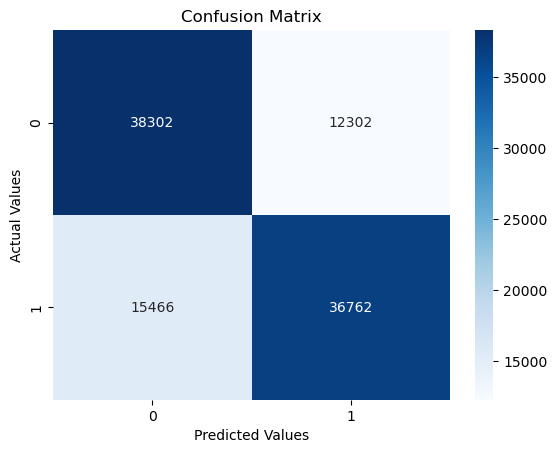

In [101]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.show()

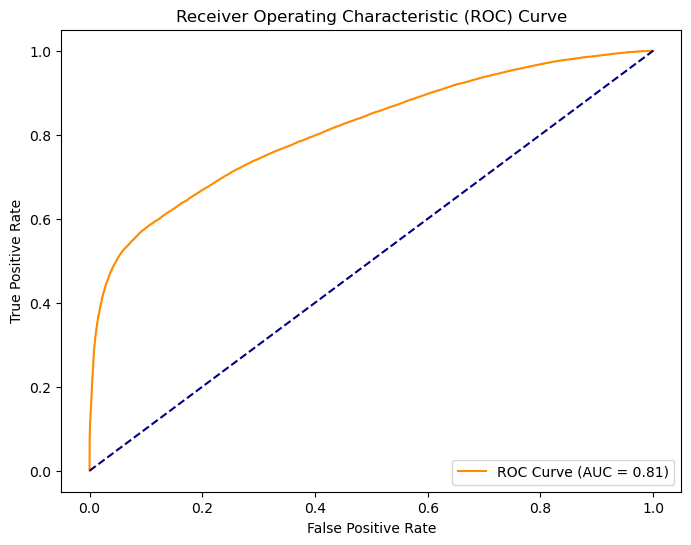

In [102]:
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### variable importance

In [103]:
coefs = model.coef_[0]
features = subset.columns.drop("Wilderness_Area1")

coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefs,
    'Absolute Coefficient': np.abs(coefs)
})
coef_df = coef_df.sort_values(by='Absolute Coefficient', ascending=False)
coef_df

,Feature,Coefficient,Absolute Coefficient
8,Hillshade_3pm,-0.955307,0.955307
5,Horizontal_Distance_To_Roadways,0.892214,0.892214
9,Horizontal_Distance_To_Fire_Points,0.767652,0.767652
2,Slope,-0.548310,0.548310
6,Hillshade_9am,-0.418381,0.418381
3,Horizontal_Distance_To_Hydrology,-0.214474,0.214474
4,Vertical_Distance_To_Hydrology,-0.200381,0.200381
7,Hillshade_Noon,0.092492,0.092492
0,Elevation,-0.087432,0.087432
1,Aspect,0.050743,0.050743


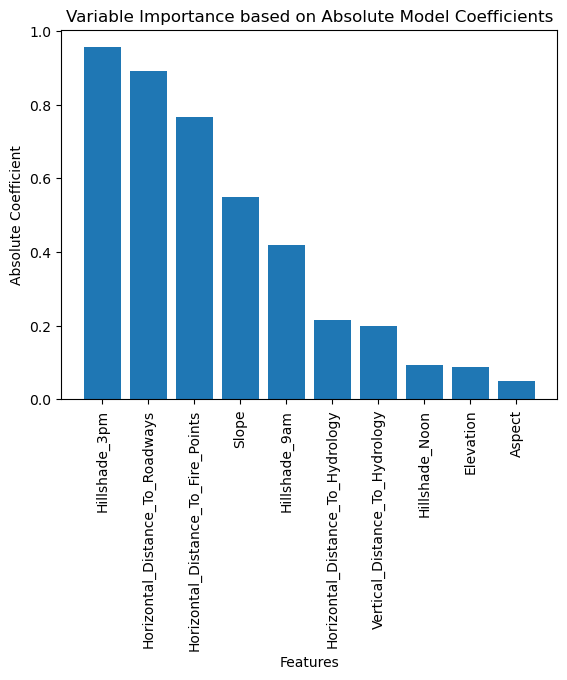

In [104]:
# variable importance plot based on absolute coefficients
plt.bar(x='Feature', height='Absolute Coefficient', data=coef_df)
plt.title('Variable Importance based on Absolute Model Coefficients')
plt.xlabel('Features')
plt.ylabel('Absolute Coefficient')
plt.xticks(rotation=90)
plt.show()

Hillshade_3pm, Horizontal_Distance_To_Roadways, and Horizontal_Distance_To_Fire_Points have the highest variable importance. This tells us that these are predictors that may be useful in creating our final model to predict covertype because the wilderness area is linked to covertype.

## PCA + Clustering

### Implementing PCA on our tree dataset.

Given our tree dataset has 581,012 rows and 54 features with a target as a cover_type, the dataset is large enough to perform some form of dimensionality reduction and PCA.

The first 10 features are
1. Elevation (meters)
2. Aspect (0–360 degrees; orientation of slope)
3. Slope (0–60 degrees)
4. Horizontal_Distance_To_Hydrology (meters)
5. Vertical_Distance_To_Hydrology (meters)
6. Horizontal_Distance_To_Roadways (meters)
7. Hillshade_9am (0–255; indirect measure of illumination)
8. Hillshade_Noon (0–255)
9. Hillshade_3pm (0–255)
10. Horizontal_Distance_To_Fire_Points (meters)

Since forest covers depend on these 10 features, we could figure out which of these features are the most important with how PCA.

We also have some one hot encoding of four different wilderness areas.

For soil, we have 40 different binary features and these could affect tree species which will then affect cover_type.

With the above variables, we perform PCA to predict the dominant tree species from the original 54 features to 10 PCs to explain the variance.

What we will test:
1. PCA before vs. after scaling
2. PCA on continuous subset vs. full dataset
3. PCA-based clustering (kMeans, GMM) to visualize geography

In [67]:
# only use numerical columns
X_nums = X[X.columns[:10]]

In [68]:
# mean of each feature
mean_vector = np.mean(X_nums, axis=0)

# center the data
X_centered = X_nums - mean_vector

# covariance matrix
cov_matrix = np.cov(X_centered, rowvar=False)

# eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# sort eigenvalues and eigenvectors
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

# project onto principal components
Y = X_centered.dot(eigenvectors)

In [69]:
# variance
explained_var = eigenvalues / eigenvalues.sum()
cumulative_var = np.cumsum(explained_var)
cumulative_var

array([0.66245305, 0.96979011, 0.98750578, 0.99609974, 0.99916751,
       0.99964069, 0.9998877 , 0.99999147, 0.99999947, 1.        ])

In our cumulative variance, we can see that by using two principal components, we already have 97% variance which captures a large proportion of our data and any further just captures extra noise.

This means that PC1 and PC2 together retain almost all the essential information and variability of our dataset and can represent an accurate summary of the entire dataset together such as relations, clusters, and patterns.

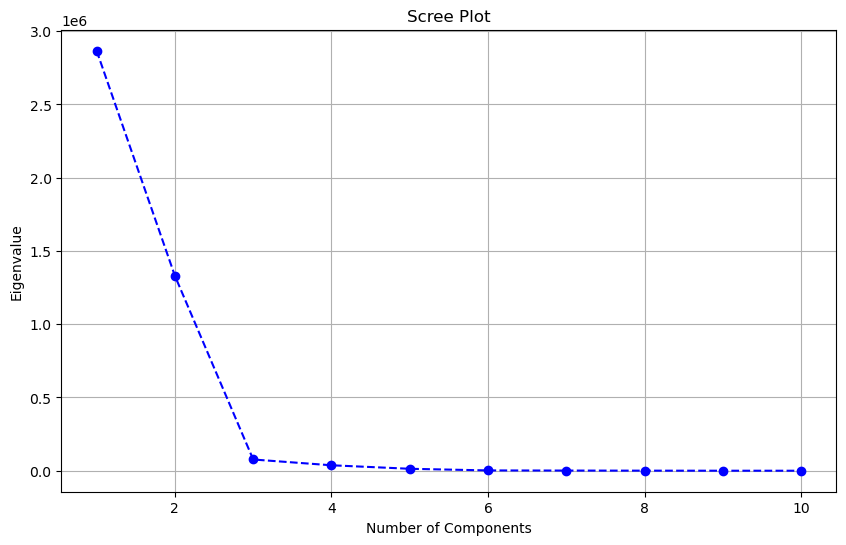

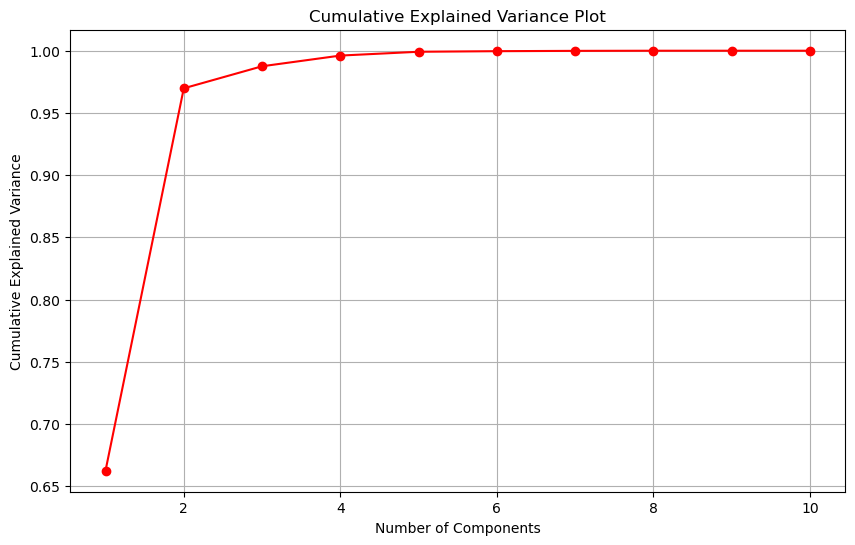

In [70]:
# Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Components')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

# Cumulative Explained Variance Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_var) + 1), cumulative_var, marker='o', linestyle='-', color='r')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Plot')
plt.grid(True)
plt.show()

Now we scale the numerical features (`X_nums`) using `StandardScaler`, apply PCA to the scaled data, and then visualize and compare the PCA results from both the unscaled and scaled data to highlight the differences.

In [71]:
# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical features
X_scaled = scaler.fit_transform(X_nums)

# Convert the scaled array back to a DataFrame for easier handling, preserving column names
X_scaled = pd.DataFrame(X_scaled, columns=X_nums.columns)

# Instantiate PCA with all components for initial analysis
pca = PCA(n_components=X_scaled.shape[1])

# Fit PCA to the scaled data
pca.fit(X_scaled)

# Transform the scaled data to get the principal components
X_pca = pca.transform(X_scaled)

# Create a DataFrame for the principal components
pca_columns = [f'PC{i+1}' for i in range(X_pca.shape[1])]
X_pca_df = pd.DataFrame(X_pca, columns=pca_columns)

# Display the first few rows of the PCA DataFrame
display(X_pca_df.head())

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-0.688812,-1.501490,-1.049702,0.505186,3.447792,-1.124809,-0.634077,0.030967,-0.061424,-0.054913
1,-0.574612,-1.569387,-1.326725,0.415917,3.447151,-1.157601,-0.638353,-0.040575,0.014848,-0.093419
2,-0.302817,-1.918021,0.217198,1.265747,2.466291,-0.169113,0.729364,-0.318155,0.223363,-0.002407
3,-0.556475,-1.098527,0.873560,1.564260,2.475231,-0.043035,1.561743,-1.019514,0.232626,0.007886
4,-0.675404,-1.531095,-1.434590,0.456953,3.373742,-1.126335,-0.667136,-0.216374,0.205080,-0.093223


Applying K-Means clustering to the principal components obtained from the scaled data to help identify natural groupings within the dataset based on the most significant variance captured by PCA. Also visualizing these clusters.

Visualizing and comparing PCA results


In [72]:
explained_var_scaled = pca.explained_variance_ratio_
cumulative_var_scaled = np.cumsum(explained_var_scaled)
print("Cumulative Explained Variance for Scaled Data:")
print(cumulative_var_scaled)

Cumulative Explained Variance for Scaled Data:
[0.25861187 0.47358739 0.64751017 0.75526375 0.832293   0.88695775
 0.93338313 0.96901457 0.99965976 1.        ]


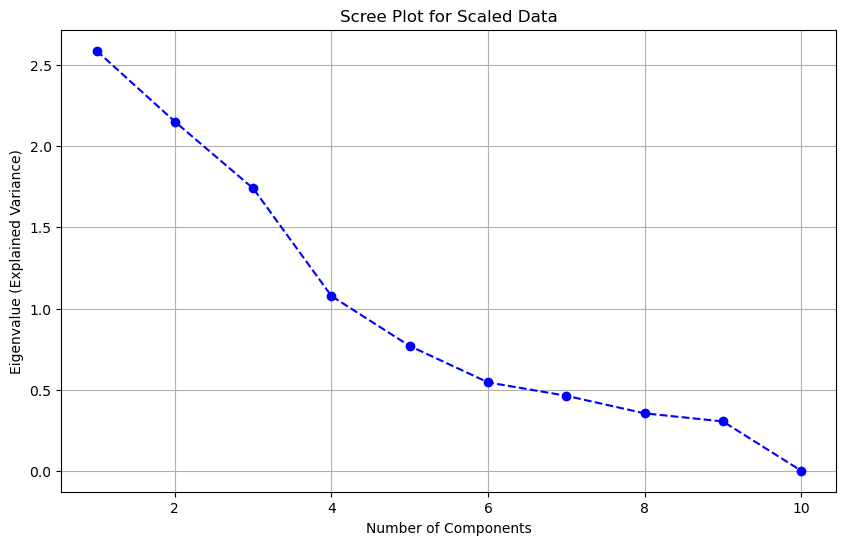

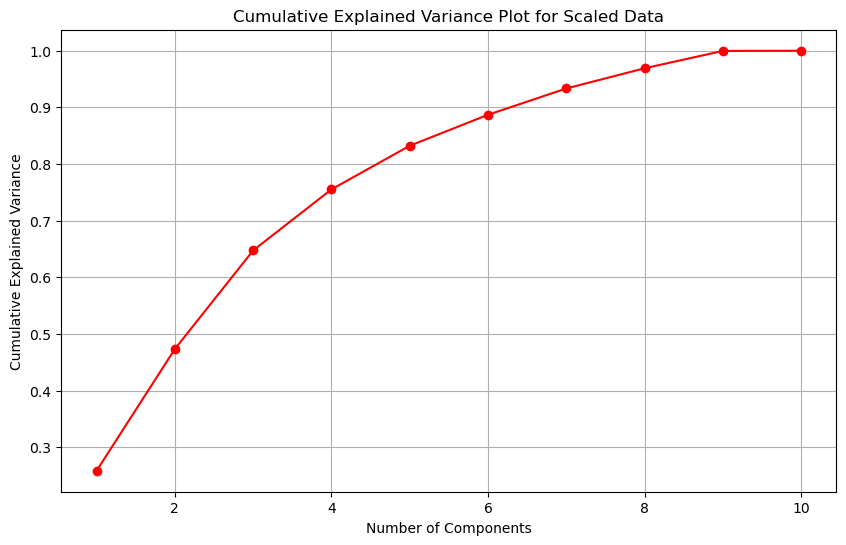

In [73]:
# Scree Plot for Scaled Data
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_) + 1), pca.explained_variance_, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Components')
plt.ylabel('Eigenvalue (Explained Variance)')
plt.title('Scree Plot for Scaled Data')
plt.grid(True)
plt.show()

# Cumulative Explained Variance Plot for Scaled Data
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_var_scaled) + 1), cumulative_var_scaled, marker='o', linestyle='-', color='r')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Plot for Scaled Data')
plt.grid(True)
plt.show()

first two principal components.

In [74]:
# Hierarchical Clustering

# Using first two PCs for simplicity in visualization
X_pca_for_clustering = X_pca_df[['PC1', 'PC2']].values

# Sample data for hierarchical clustering
# We'll sample 15,000 points for hierarchical clustering, then assign all points to clusters
sample_size = 15000
np.random.seed(42)
sample_indices = np.random.choice(len(X_pca_for_clustering), size=sample_size, replace=False)
X_pca_sample = X_pca_for_clustering[sample_indices]

# Hierarchical clustering on sampled PCA-transformed data
hierarchical_cluster_pca = AgglomerativeClustering(
    n_clusters=7,
    linkage='ward',
    metric='euclidean'
)
hierarchical_labels_sample = hierarchical_cluster_pca.fit_predict(X_pca_sample)

# Use NearestCentroid to assign all points to clusters based on sample
# This computes cluster centers from the sample and assigns all points to nearest center
nc = NearestCentroid()
nc.fit(X_pca_sample, hierarchical_labels_sample)
hierarchical_labels_pca = nc.predict(X_pca_for_clustering)
X_pca_df['Hierarchical_Cluster'] = hierarchical_labels_pca

# K-Means clustering on PCA-transformed data (can handle full dataset efficiently)
kmeans = KMeans(n_clusters=7, random_state=42, n_init=10)
kmeans_labels_pca = kmeans.fit_predict(X_pca_for_clustering)
X_pca_df['KMeans_Cluster'] = kmeans_labels_pca

# Print cluster sizes
print("\nHierarchical Cluster sizes (based on sample):")
print(X_pca_df['Hierarchical_Cluster'].value_counts().sort_index())
print("\nK-Means Cluster sizes:")
print(X_pca_df['KMeans_Cluster'].value_counts().sort_index())


Hierarchical Cluster sizes (based on sample):
Hierarchical_Cluster
0     50702
1    153444
2    136439
3     27820
4     70589
5     64823
6     77195
Name: count, dtype: int64

K-Means Cluster sizes:
KMeans_Cluster
0    144215
1     95717
2     34150
3     27371
4     92291
5     86166
6    101102
Name: count, dtype: int64


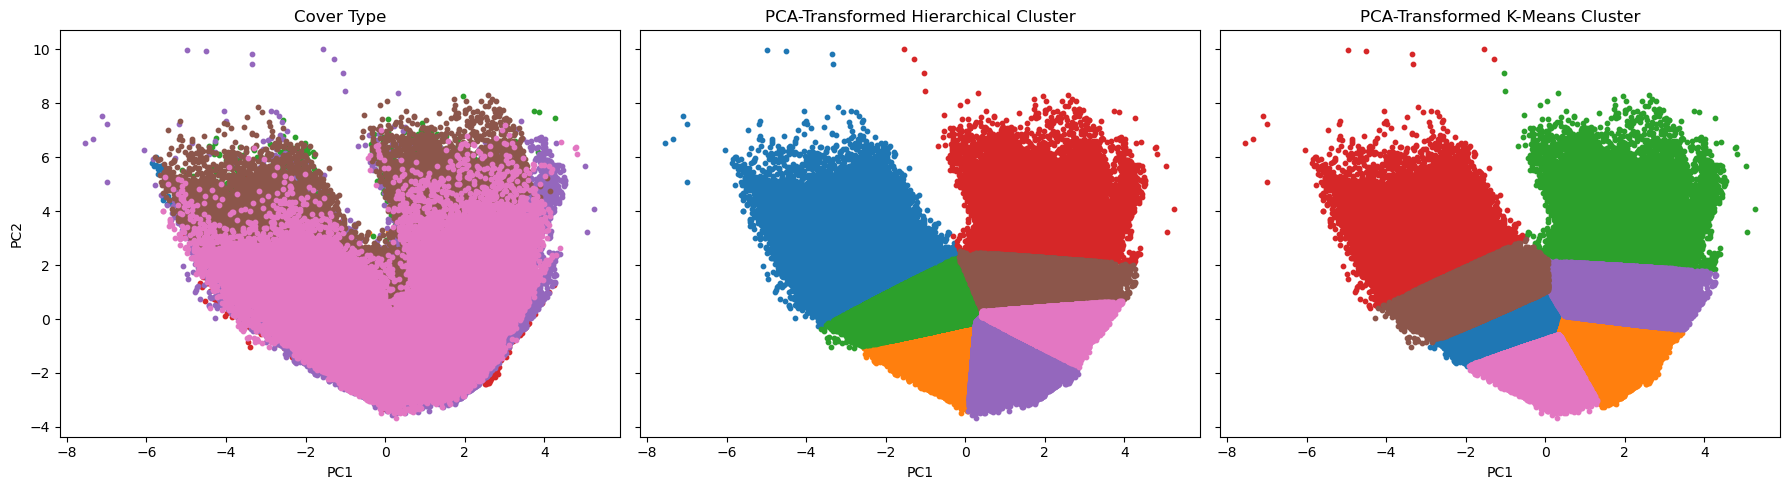

In [75]:
# Visualization
# This section updates visualization to show 3 plots: Cover Type, Hierarchical, K-Means

# Create plot data with PC1, PC2, Cover_Type, and Cluster labels
plot_data_pca = pd.DataFrame({
    'PC1': X_pca_df['PC1'],
    'PC2': X_pca_df['PC2'],
    'Cover_Type': y['Cover_Type'].astype(str),
    'Hierarchical_Cluster': X_pca_df['Hierarchical_Cluster'].astype(str),
    'KMeans_Cluster': X_pca_df['KMeans_Cluster'].astype(str)
})

# Create three scatter plots side by side
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharex=True, sharey=True)

# Cover Type
ax = axes[0]
for cover_type in sorted(plot_data_pca['Cover_Type'].unique()):
    mask = plot_data_pca['Cover_Type'] == cover_type
    ax.scatter(
        plot_data_pca.loc[mask, 'PC1'],
        plot_data_pca.loc[mask, 'PC2'],
        s=10
    )
ax.set_title('Cover Type')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

# PCA-Transformed Hierarchical Cluster
ax = axes[1]
for cluster in sorted(plot_data_pca['Hierarchical_Cluster'].unique()):
    mask = plot_data_pca['Hierarchical_Cluster'] == cluster
    ax.scatter(
        plot_data_pca.loc[mask, 'PC1'],
        plot_data_pca.loc[mask, 'PC2'],
        s=10
    )
ax.set_title('PCA-Transformed Hierarchical Cluster')
ax.set_xlabel('PC1')

# PCA-Transformed K-Means Cluster
ax = axes[2]
for cluster in sorted(plot_data_pca['KMeans_Cluster'].unique()):
    mask = plot_data_pca['KMeans_Cluster'] == cluster
    ax.scatter(
        plot_data_pca.loc[mask, 'PC1'],
        plot_data_pca.loc[mask, 'PC2'],
        s=10
    )
ax.set_title('PCA-Transformed K-Means Cluster')
ax.set_xlabel('PC1')

plt.tight_layout()
plt.show()

### Summary:

1. For our data scaling, the numerical features X_nums were successfully scaled using StandardScaler, resulting in X_scaled having values centered around zero with unit variance.
2. For our PCA on the scaled data, we applied the PCA and the resulting principal components were stored and plotted.

To explain the results, after we scaled the data, we approximately need 8 principal components to explain 97% of the total variance in comparison to the two principal components from the previous attempt we did. This means the eigenvalues in the scree plot for scaled data dropped off more gardually, indicting that there was an even distribution of variance across the components we stated at the start.

On the unscaled data, the two principal components were capable of explaining 97% of the total variacne, larger due to the fact that features with larger scales dominated the variance such as elevation or horizontal_distance_to_roadways which would be in the thousands, which is much greater than the other values.

After scaling, we can see that the variance is actually distributed much more evenly, meaning that every feature category has a balanced contribution to the results.

### Clustering

1. Scaling data before PCA is crucial to prevent features with larger magnitudes from disproportionately influencing the principal components, leading to a more robust and balanced representation of the underlying data structure.

After applying k-means to the PCA-transformed data, the resulting clusters formed distinct wedge shaped regions in the two dimensional principal component space. This indicates that the dataset was partitioned based on Euclidean proximity to centroids rather than separating naturally occurring groups.

K-means can be useful for exploratory segmentation, but it did not correspond directly to cover types in this dataset. Evaluating cluster composition (e.g., via cross-tabulation with the cover labels) or applying nonlinear clustering methods could provide us deeper insight into the structure of the data.

Summary:

Based on the clustering results, we can come up with a couple of conclusions about the cover types. From the cover types, we can see that some of them are well separated, so cover types that form distinct clusters are well separated and correspond to cover types that have distinct features unlike others. For clusters that mixed frequently, we could conclude that they most likely share features that indicate what cover type they may be.

Overall, cover types that cluster well are easier for us to come to a conclusion on so PCA visualization does help us identify which of the original features are most important for separating different cover types.

First, we applied PCA to our dataset with an unscaled PCA and a scaled PCA. The scaled version was to normalize the numerical features as some features may have different scales/ranges such as elevation or hillsahde values, and unscaled PCA would have just been dominated by features that had larger numerical values.

We applied two clustering methods with K-means and hierarchical with ward linkage and euclidean distance.

Overall, it seems that the K-means clustering performed better than hierarchical. K-means had created more distinct, non overlapping clusters that aligned well with how the cover types were defined.

Our problem with predicting forest cover types was largely based on the geographic and environmental features so the combination of PCA + K-means clustering was particularly effective because it would take a long time to run through all 500k data points, but with PCA, we could understand which features were most important from distinguishing cover types, namely PC1 and PC2.

## Neural Network

In [105]:
# # Uses GPU runtime
# device = torch.device("cuda:0")
loss_function = nn.CrossEntropyLoss()

# Extremely simple model architecture
model = nn.Sequential()

# Input layer
model.add_module("Input", nn.Linear(in_features = X.shape[1], out_features = 1024))

# Hidden layers
model.add_module("Hidden Layer 1", nn.Linear(in_features=1024, out_features=1024))
model.add_module("Activation 1", nn.Sigmoid())
model.add_module("Hidden Layer 2", nn.Linear(in_features=1024, out_features=1024))  
model.add_module("Activation 2", nn.Sigmoid())

# Add dropout for regularization
model.add_module("Dropout", nn.Dropout(p=0.5))

# Output layer
model.add_module("Output", nn.Linear(in_features=1024, out_features = len(np.unique(y))))
# model.to(device)

In [107]:
batch_size = 100

# revert cover type back to numeric for PyTorch
reverse_cover_type_map = {v: k for k, v in cover_type_map.items()}
y_numeric = y['Cover_Type'].map(reverse_cover_type_map)

# Shift the y labels to start from 0 (if this doesn't happen, PyTorch can't train)
y_numeric = y_numeric - 1

# Convert Trees Pandas DataFrame to Torch Tensors
# Scaled the data to minimize effect of features with larger ranges (such as distance to hydrology)
X_tensor = torch.tensor(StandardScaler().fit_transform(X.to_numpy()), dtype=torch.float32)
y_tensor = torch.tensor(y_numeric.to_numpy(), dtype=torch.long)

# Split dataset into training, validation and testing sets
# Stratify the y-data to preserve class distribution
X_train, X_temp, y_train, y_temp = train_test_split(X_tensor, y_tensor, test_size=0.3, random_state=42, stratify=y_tensor)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)
test_dataset = TensorDataset(X_test, y_test)

# Convert to DataLoader for batching
train_dl = DataLoader(train_dataset, batch_size = batch_size, shuffle=True)
val_dl = DataLoader(val_dataset, batch_size = batch_size, shuffle=False)
test_dl = DataLoader(test_dataset, batch_size = batch_size, shuffle=False)

In [108]:
num_epochs = 10

# We will use the cross entropy loss function for multiclass
loss_function = nn.CrossEntropyLoss()

# Use standard optimizer, Adam optimizer for backpropagation calculations
# Fix the learning rate for now
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

# Our training function (just the same thing from the MNIST notebook)
def train(model, num_epochs, train_dl, valid_dl):
    loss_hist_train = [0] * num_epochs
    accuracy_hist_train = [0] * num_epochs
    loss_hist_valid = [0] * num_epochs
    accuracy_hist_valid = [0] * num_epochs

    # Form 
    for epoch in range(num_epochs):
        model.train()
        for x_batch, y_batch in train_dl:
            # x_batch = x_batch.to(device)
            # y_batch = y_batch.to(device)
            pred = model(x_batch)
            loss = loss_function(pred, y_batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            loss_hist_train[epoch] += loss.item()*y_batch.size(0)
            is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
            accuracy_hist_train[epoch] += is_correct.sum().cpu()

        loss_hist_train[epoch] /= len(train_dl.dataset)
        accuracy_hist_train[epoch] /= len(train_dl.dataset)

        model.eval()
        with torch.no_grad():
            for x_batch, y_batch in valid_dl:
                # x_batch = x_batch.to(device)
                # y_batch = y_batch.to(device)
                pred = model(x_batch)
                loss = loss_function(pred, y_batch)
                loss_hist_valid[epoch] += loss.item() * y_batch.size(0)
                is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
                accuracy_hist_valid[epoch] += is_correct.sum().cpu()

        loss_hist_valid[epoch] /= len(valid_dl.dataset)
        accuracy_hist_valid[epoch] /= len(valid_dl.dataset)

        print(f'Epoch {epoch+1} accuracy: {accuracy_hist_train[epoch]:.4f} val_accuracy: {accuracy_hist_valid[epoch]:.4f}')
    return loss_hist_train, loss_hist_valid, accuracy_hist_train, accuracy_hist_valid

torch.manual_seed(1)
hist_train_validation = train(model, num_epochs, train_dl, val_dl)

Epoch 1 accuracy: 0.7820 val_accuracy: 0.8471
Epoch 2 accuracy: 0.8603 val_accuracy: 0.8717
Epoch 2 accuracy: 0.8603 val_accuracy: 0.8717
Epoch 3 accuracy: 0.8806 val_accuracy: 0.8878
Epoch 3 accuracy: 0.8806 val_accuracy: 0.8878
Epoch 4 accuracy: 0.8901 val_accuracy: 0.8986
Epoch 4 accuracy: 0.8901 val_accuracy: 0.8986
Epoch 5 accuracy: 0.8954 val_accuracy: 0.9027
Epoch 5 accuracy: 0.8954 val_accuracy: 0.9027
Epoch 6 accuracy: 0.8999 val_accuracy: 0.9041
Epoch 6 accuracy: 0.8999 val_accuracy: 0.9041
Epoch 7 accuracy: 0.9020 val_accuracy: 0.9091
Epoch 7 accuracy: 0.9020 val_accuracy: 0.9091
Epoch 8 accuracy: 0.9045 val_accuracy: 0.9102
Epoch 8 accuracy: 0.9045 val_accuracy: 0.9102
Epoch 9 accuracy: 0.9062 val_accuracy: 0.9036
Epoch 9 accuracy: 0.9062 val_accuracy: 0.9036
Epoch 10 accuracy: 0.9080 val_accuracy: 0.9110
Epoch 10 accuracy: 0.9080 val_accuracy: 0.9110


For our neural network training, we used crossentropyloss as the standard loss function as it combines logsoftmax to convert our logits into probabilities and measures how well the predicted probabilities match the true class labels.

Since we have 7 forest cover types, using CrossEntropyLoss penalizes confident wrong predictions more heavily than uncertain ones and we can see that the loss decreases as the epochs increases.

To preprocess our data, we normalized our features using standard scaling to ensure that all features have a mean of 0 and a standard deviation of 1. This helps the neural network converge faster and improves overall performance.

For our accuracy, we need it to detect overfitting by tracking it separately on our training and validation sets.

For our learning rate, we decided with learning rate of 0.001 being the best with fast convergence, stable training epochs, and a solid final validation accuracy.

For our hyperparameter tuning, we chose SGD from class with momentum to get convergence and was a solid choice for neural network training. For our batch size, we chose 100 as we wanted to have faster updates with generalization and 10 epochs to see model behavior after convergence.

To complete everything, we split it into a training of 70, validation of 15, and test of 15 using PyTorch's default initialization. Our forward pass computes the predictions and CrossEntropyLoss calculates the loss and our backward pass computing the gradient with SGD as our optimization.